In [2]:
# Import the required modules
import requests
from bs4 import BeautifulSoup
import string
import re
import json
import geopy
from numpy import genfromtxt
from PIL import Image
import codecs
import csv
import time
from datetime import datetime
import urllib
import os

In [2]:
world_cities = {}
with open('worldcities.csv', 'r') as file:
    reader = csv.reader(file,delimiter = ',')
    for row in reader:
        world_cities[row[1]] = [row[2],row[3]]
world_cities['Bamiyan'] = [34.81081368237951, 67.82100444532767]

In [3]:
world_cities

{'city_ascii': ['lat', 'lng'],
 'Tokyo': ['35.6897', '139.6922'],
 'Jakarta': ['-6.2146', '106.8451'],
 'Delhi': ['37.4306', '-120.7759'],
 'Mumbai': ['18.9667', '72.8333'],
 'Manila': ['14.6000', '120.9833'],
 'Shanghai': ['31.1667', '121.4667'],
 'Sao Paulo': ['-23.5504', '-46.6339'],
 'Seoul': ['37.5600', '126.9900'],
 'Mexico City': ['19.4333', '-99.1333'],
 'Guangzhou': ['23.1288', '113.2590'],
 'Beijing': ['39.9050', '116.3914'],
 'Cairo': ['42.2965', '-74.0205'],
 'New York': ['40.6943', '-73.9249'],
 'Kolkata': ['22.5411', '88.3378'],
 'Moscow': ['46.7307', '-116.9986'],
 'Bangkok': ['13.7500', '100.5167'],
 'Buenos Aires': ['-7.7258', '-35.3269'],
 'Shenzhen': ['22.5350', '114.0540'],
 'Dhaka': ['23.7289', '90.3944'],
 'Lagos': ['37.1000', '-8.6667'],
 'Istanbul': ['41.0100', '28.9603'],
 'Osaka': ['34.7500', '135.4601'],
 'Karachi': ['24.8600', '67.0100'],
 'Bangalore': ['12.9699', '77.5980'],
 'Tehran': ['35.7000', '51.4167'],
 'Kinshasa': ['-4.3233', '15.3081'],
 'Ho Chi Mi

In [4]:
#Scraping the link to each county as first step.
countries = []
co_link = []
base_url = "https://commons.wikimedia.org/wiki/Category:Postcards_by_country"
r = requests.get(base_url)
src = r.content
soup = BeautifulSoup(src,'lxml')
category = soup.find_all('div', {'class': 'CategoryTreeItem'})

In [5]:
#Function to convert list to string.
def listToString(s): 
    # initialize an empty string
    str1 = " "  
    return (str1.join(s))

In [6]:
#Scraping the title of each country in commons wikki.
countries_tag = []
for h in category:
    countries_tag.append(h.text.strip())
    co_link.append('https://commons.wikimedia.org'+h.find("a").attrs['href'])    
co_link = co_link[10:]
countries_tag = countries_tag[10:]  

In [7]:
countries_tag

['Postcards of Afghanistan\u200e (11 F)',
 'Postcards of Albania\u200e (4 C,  18 F)',
 'Postcards of Algeria\u200e (6 C,  34 F)',
 'Postcards of Angola\u200e (3 F)',
 'Postcards of Antigua and Barbuda\u200e (1 F)',
 'Postcards of Argentina\u200e (2 C,  36 F)',
 'Postcards of Armenia\u200e (2 C,  7 F)',
 'Postcards of Aruba\u200e (14 F)',
 'Postcards of Australia\u200e (6 C,  95 F)',
 'Postcards of Austria\u200e (16 C,  39 F)',
 'Postcards of Austria-Hungary\u200e (35 C,  714 F)',
 'Postcards of Azerbaijan\u200e (5 C,  4 F)',
 'Postcards by Bahamas\u200e (1 F)',
 'Postcards of Belarus\u200e (8 C,  4 F)',
 'Postcards of Belgium\u200e (10 C,  63 F)',
 'Postcards of Belize\u200e (1 F)',
 'Postcards of Benin\u200e (56 F)',
 'Postcards of Bermuda\u200e (6 F)',
 'Postcards of Bhutan\u200e (2 F)',
 'Postcards of Bolivia\u200e (1 F)',
 'Postcards of Bosnia and Herzegovina\u200e (7 C,  142 F)',
 'Postcards of Brazil\u200e (11 C,  11 F)',
 'Postcards of Bulgaria\u200e (4 C,  47 F)',
 'Postcards o

In [8]:
co_link

['https://commons.wikimedia.org/wiki/Category:Postcards_of_Afghanistan',
 'https://commons.wikimedia.org/wiki/Category:Postcards_of_Albania',
 'https://commons.wikimedia.org/wiki/Category:Postcards_of_Algeria',
 'https://commons.wikimedia.org/wiki/Category:Postcards_of_Angola',
 'https://commons.wikimedia.org/wiki/Category:Postcards_of_Antigua_and_Barbuda',
 'https://commons.wikimedia.org/wiki/Category:Postcards_of_Argentina',
 'https://commons.wikimedia.org/wiki/Category:Postcards_of_Armenia',
 'https://commons.wikimedia.org/wiki/Category:Postcards_of_Aruba',
 'https://commons.wikimedia.org/wiki/Category:Postcards_of_Australia',
 'https://commons.wikimedia.org/wiki/Category:Postcards_of_Austria',
 'https://commons.wikimedia.org/wiki/Category:Postcards_of_Austria-Hungary',
 'https://commons.wikimedia.org/wiki/Category:Postcards_of_Azerbaijan',
 'https://commons.wikimedia.org/wiki/Category:Postcards_by_Bahamas',
 'https://commons.wikimedia.org/wiki/Category:Postcards_of_Belarus',
 'http

In [9]:
#Cleaning names of countries.
for country in countries_tag:
    country_name = country[13:].strip()
    x = re.sub("[^a-zA-ZéãíšášříěčÎëèâôÉüÖßČöúóțőžāłęźąŁŠŚŻșăŽč-]+", " ", country_name)
    x = x.split(' ')
    x = x[:-2]
    if x[-1] == 'F':
        x = x[:-1]
    if x[-1] == 'C':
        x = x[:-1]
    x = listToString(x)
    countries.append(x)

In [10]:
countries                    

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Austria-Hungary',
 'Azerbaijan',
 'Bahamas',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Canada',
 'Cape Verde',
 'the Central African Republic',
 'the Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'the Comoros',
 'the Republic of the Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'the Czech Republic',
 'Czechoslovakia',
 'Denmark',
 'Djibouti',
 'the Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'French Indochina',
 'Gabon',
 'the Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece C P',
 'Greenland',
 'Guadeloupe',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'India',
 'Indochina',
 'Indonesia'

In [11]:
len(countries)

167

In [12]:
#Replace the old countries name to the newer name of the same country.
countries[10] = 'Austria'
countries[26] = 'Central African Republic'
countries[32] = 'Republic of the Congo'
countries[51] = 'Indochina'
countries[120] = 'Philippines'

In [13]:
#found the coordinates of each coutry.
coordinates = {}
for contry in countries:
    locator = geopy.Nominatim(user_agent="myGeocoder")
    location = locator.geocode(contry, timeout= None)
    coordinates[contry] = [location.latitude, location.longitude]

In [14]:
coordinates

{'Afghanistan': [33.7680065, 66.2385139],
 'Albania': [41.000028, 19.9999619],
 'Algeria': [28.0000272, 2.9999825],
 'Angola': [-11.8775768, 17.5691241],
 'Antigua and Barbuda': [17.2234721, -61.9554608],
 'Argentina': [-34.9964963, -64.9672817],
 'Armenia': [40.7696272, 44.6736646],
 'Aruba': [12.51756625, -69.98186415210564],
 'Australia': [-24.7761086, 134.755],
 'Austria': [47.2, 13.2],
 'Azerbaijan': [40.3936294, 47.7872508],
 'Bahamas': [24.7736546, -78.0000547],
 'Belarus': [53.4250605, 27.6971358],
 'Belgium': [50.6402809, 4.6667145],
 'Belize': [16.8259793, -88.7600927],
 'Benin': [9.5293472, 2.2584408],
 'Bermuda': [32.30382, -64.7561647],
 'Bhutan': [27.549511, 90.5119273],
 'Bolivia': [-17.0568696, -64.9912286],
 'Bosnia and Herzegovina': [44.3053476, 17.5961467],
 'Brazil': [-10.3333333, -53.2],
 'Bulgaria': [42.6073975, 25.4856617],
 'Cambodia': [13.5066394, 104.869423],
 'Canada': [61.0666922, -107.991707],
 'Cape Verde': [16.0000552, -24.0083947],
 'Central African Repu

In [15]:
# images direct from countries links
dic = {}

In [16]:
#Scraping link for each image from every coutry
for i in range(len(co_link)):
    result = requests.get(co_link[i])
    src = result.content
    soup = BeautifulSoup(src,'lxml')
    images_link = soup.find_all('div' , {'class': 'gallerytext'})
    img_link = []
    for att in images_link:
        img_link.append('https://commons.wikimedia.org'+att.find("a").attrs['href'])
    
    dic[countries[i]] = img_link    

In [17]:
dic

{'Afghanistan': ['https://commons.wikimedia.org/wiki/File:Bamiyan_valley_1967_postcard.jpg',
  'https://commons.wikimedia.org/wiki/File:Buddha_1950s_postcard_2.jpg',
  'https://commons.wikimedia.org/wiki/File:Buddha_1950s_postcard.jpg',
  'https://commons.wikimedia.org/wiki/File:Buddha_Afghanistan_Information_Bureau_1950s.jpg',
  'https://commons.wikimedia.org/wiki/File:Buddha_taller_1967_postcard.jpg',
  'https://commons.wikimedia.org/wiki/File:Istalif_postcard_1950s.jpg',
  'https://commons.wikimedia.org/wiki/File:Pul-e_Khishti_Kabul_postcard.jpg',
  'https://commons.wikimedia.org/wiki/File:Royal_Park_Jalalabad_postcard.jpg',
  'https://commons.wikimedia.org/wiki/File:Zarnegar_mausoleum_palace_postcard_-_cropped.jpg',
  'https://commons.wikimedia.org/wiki/File:Zarnegar_mausoleum_palace_postcard.jpg',
  'https://commons.wikimedia.org/wiki/File:%D8%AF_%D8%A7%D9%85%D9%8A%D8%B1_%D8%B9%D8%A8%D8%AF%D8%A7%D9%84%D8%B1%D8%AD%D9%85%D9%86_%D8%AE%D8%A7%D9%86_%D8%A7%D8%B1%D8%A7%D9%85%DA%81%D8%A7%

In [18]:
#Scraping the name, link descrition and date for each image.
description = {}
name = {}
#name_jpg = {}
links_co = {}
date = {}
web_link = {}
i = 0
for keys, values in dic.items():
    name_list = []
    #name_list_jpg = []
    description_list = []
    link_list = []
    date_list = []
    web_list = [] 
    for links in values:
        result = requests.get(links)
        src = result.content
        soup = BeautifulSoup(src,'lxml')
        
        suffix = ['.jpg','jpeg','.png','.tif','tiff','.gif']
        
        images_name = soup.find('h1' , {'id': 'firstHeading'}).text
        if images_name[-4:].lower() in suffix:
            name_list.append(images_name[5:-4])
            #print(images_name[5:-4])
            #name_list_jpg.append(images_name[5:])
            images_date = soup.find('td' , {'class': 'description'})
            if images_date == None:
                x = 'No description avilable'
                description_list.append(x)
            #print(x) 
            else:
                x = images_date.text
                description_list.append(x)
                #print(x)                                                                                     
            images_link = soup.find('div' , {'class': 'fullImageLink','id': 'file'})
            #print(images_link)
            y = images_link.find('a').attrs['href']
            #print(y)
            link_list.append(y)                            
            #print(y)
            date1 = soup.find("td", text="Date")
            if date1 != None:
                date2 = date1.find_next_sibling().text
                date_list.append(date2)
                #print(date2)
            else:
                date_list.append('None')
                #print('none')
            web_list.append(links)
    description[keys] = description_list
    name[keys] = name_list
    #name_jpg[keys] = name_list_jpg 
    links_co[keys] = link_list
    date[keys] = date_list
    web_link[keys] = web_list
    print(i)
    i = i+1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164


In [19]:
name_1 = {}
for key, values in name.items():
    lst = []
    for value in values:
        value = value.replace('postcard','')
        lst.append(value)
    name_1[key] = lst

In [20]:
len(dic)

165

In [55]:
geojson = {
    'type': 'FeatureCollection',
    'features': [
        
    ]
}   

In [56]:

for key, value in name_1.items():
    for i in range(len(value)):
        geojson['features'].append({
            'type': 'Feature',
            'properties': {
                'id' : i,
                'name': name_1[key][i],
                'country': key,
                'source': links_co[key][i],
                'link': web_link[key][i],
                'discription': description[key][i][1:],
                'path': '',
                'date' : date[key][i]
            },
            'geometry': {
                'type': 'Point',
                'coordinates': []
            }
            })

In [57]:
len(geojson['features'])

5955

In [24]:
coordinates

{'Afghanistan': [33.7680065, 66.2385139],
 'Albania': [41.000028, 19.9999619],
 'Algeria': [28.0000272, 2.9999825],
 'Angola': [-11.8775768, 17.5691241],
 'Antigua and Barbuda': [17.2234721, -61.9554608],
 'Argentina': [-34.9964963, -64.9672817],
 'Armenia': [40.7696272, 44.6736646],
 'Aruba': [12.51756625, -69.98186415210564],
 'Australia': [-24.7761086, 134.755],
 'Austria': [47.2, 13.2],
 'Azerbaijan': [40.3936294, 47.7872508],
 'Bahamas': [24.7736546, -78.0000547],
 'Belarus': [53.4250605, 27.6971358],
 'Belgium': [50.6402809, 4.6667145],
 'Belize': [16.8259793, -88.7600927],
 'Benin': [9.5293472, 2.2584408],
 'Bermuda': [32.30382, -64.7561647],
 'Bhutan': [27.549511, 90.5119273],
 'Bolivia': [-17.0568696, -64.9912286],
 'Bosnia and Herzegovina': [44.3053476, 17.5961467],
 'Brazil': [-10.3333333, -53.2],
 'Bulgaria': [42.6073975, 25.4856617],
 'Cambodia': [13.5066394, 104.869423],
 'Canada': [61.0666922, -107.991707],
 'Cape Verde': [16.0000552, -24.0083947],
 'Central African Repu

In [25]:
cities_low = []
for key in world_cities.keys():
    cities_low.append(key.lower())

In [26]:
coordinates[geojson['features'][0]['properties']['country']]

[33.7680065, 66.2385139]

In [62]:
# first it tries to find coordinates by images name. 
# it not so it tries to find coordinates by description
# finally it tries to find countries corrdinates if it failds to find it 
# by name and description

for i in range(5834, len(geojson['features'])): #len(geojson['features'])
    coor = []
    locator = geopy.Nominatim(user_agent="myGeocoder")
    
    for ci in geojson['features'][i]['properties']['name'].replace('-',' ').lower().split(' '): 
        #print(ci , '1')
        location = locator.geocode(ci+' '+ geojson['features'][i]['properties']['country'],timeout = None)
        #print(location , '1')
        if location != None and ci in cities_low:
            coor = [location.latitude, location.longitude]
            #print(ci,  coor)
            break;
    #or ci.lower() in geojson['features'][i]['properties']['discription'].replace('-',' ').lower().split(' ')      
    location = locator.geocode(geojson['features'][i]['properties']['name'],timeout = None)       
    if location != None and len(coor) == 0:
        coor = [location.latitude, location.longitude]
        
    elif location == None and len(coor) == 0:
        location = locator.geocode(geojson['features'][i]['properties']['discription'], timeout = None)
        if location != None:
            coor = [location.latitude, location.longitude]
        else:
            #locator = geopy.Nominatim(user_agent="myGeocoder")
            #location = locator.geocode(geojson['features'][i]['properties']['country'], timeout= None)
            coor = coordinates[geojson['features'][i]['properties']['country']]#[location.latitude, location.longitude]
            
    geojson['features'][i]['geometry']['coordinates'] = coor
    #print(coor)
    print(i)
    

5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923
5924
5925
5926
5927
5928
5929
5930
5931
5932
5933
5934
5935
5936
5937
5938
5939
5940
5941
5942
5943
5944
5945
5946
5947
5948
5949
5950
5951
5952
5953
5954


In [70]:
geojson['features'][5759]#['geometry']['coordinates'] = [42.333084178376104, -83.06078673131972]

{'type': 'Feature',
 'properties': {'id': 161,
  'name': 'Unknown West - A Poker Game (NBY 432153)',
  'country': 'the United States',
  'source': 'https://upload.wikimedia.org/wikipedia/commons/1/1b/Unknown_West_-_A_Poker_Game_%28NBY_432153%29.jpg',
  'link': 'https://commons.wikimedia.org/wiki/File:Unknown_West_-_A_Poker_Game_(NBY_432153).jpg',
  'discription': 'English:  Unknown West - A Poker Game',
  'path': '',
  'date': '\nUnknown dateUnknown date'},
 'geometry': {'type': 'Point',
  'coordinates': [42.333084178376104, -83.06078673131972]}}

In [73]:
for featur in geojson['features']:
     print(featur['properties']['date'])


1967

1950s date QS:P,+1950-00-00T00:00:00Z/8

1950s date QS:P,+1950-00-00T00:00:00Z/8

1950s date QS:P,+1950-00-00T00:00:00Z/8

1967

c. 1950s

circa 1960 date QS:P,+1960-00-00T00:00:00Z/9,P1480,Q5727902

c. 1910s-1920s

1960s date QS:P,+1960-00-00T00:00:00Z/8

circa 1960 date QS:P,+1960-00-00T00:00:00Z/9,P1480,Q5727902

circa 1970 date QS:P,+1970-00-00T00:00:00Z/9,P1480,Q5727902

before 1918 date QS:P,+1918-00-00T00:00:00Z/7,P1326,+1918-00-00T00:00:00Z/9

26 November 2013, 11:50:37

1920

before 1919 date QS:P,+1919-00-00T00:00:00Z/7,P1326,+1919-00-00T00:00:00Z/9

June 1914date QS:P571,+1914-06-00T00:00:00Z/10

None

30 December 2017

10 October 2018, 20:51:11

10 October 2018, 20:52:33

First World War

10 November 2012, 21:13:08

circa 1910 date QS:P,+1910-00-00T00:00:00Z/9,P1480,Q5727902

10 October 2018, 21:00:57

Before 1916 // Πριν το 1916

12 March 2015

1 January 1900

26 November 2013, 11:47:11

26 November 2013, 11:51:26

10 March 2012, 04:48:38

1928

early 20th century



circa 1900 date QS:P,+1900-00-00T00:00:00Z/9,P1480,Q5727902

1900s date QS:P,+1900-00-00T00:00:00Z/8

3 July 1934

22 February 2007 (original upload date)

ca. 1933–1935

before 1914 date QS:P,+1914-00-00T00:00:00Z/7,P1326,+1914-00-00T00:00:00Z/9

19 May 2017, 21:28:47

1902

1904

1901

1904

1 January 1930

9 September 1946

13 August 1909
None

between 1914 and 1918 date QS:P,+1914-00-00T00:00:00Z/8,P1319,+1914-00-00T00:00:00Z/9,P1326,+1918-00-00T00:00:00Z/9 according to LOC, but most likely 1914.

Undated but c. 1910

1945

before 1886 date QS:P,+1886-00-00T00:00:00Z/7,P1326,+1886-00-00T00:00:00Z/9

1915date QS:P571,+1915-00-00T00:00:00Z/9


1935
None

1902

1915

circa 1919 date QS:P,+1919-00-00T00:00:00Z/9,P1480,Q5727902

Años 1900

~1940

circa 1910 date QS:P,+1910-00-00T00:00:00Z/9,P1480,Q5727902

17 July 1914

ca. 1923/1924

vor 15.9.1919

1949

2007

17 June 1938

18 October 1944

circa 1870 date QS:P,+1870-00-00T00:00:00Z/9,P1480,Q5727902

1941

16 February 2014, 00:49

Mess


circa 1920 date QS:P,+1920-00-00T00:00:00Z/9,P1480,Q5727902

1 January 1910

1 January 1910

circa 1925 date QS:P571,+1925-00-00T00:00:00Z/9,P1480,Q5727902

circa 1925 date QS:P571,+1925-00-00T00:00:00Z/9,P1480,Q5727902

circa 1949 date QS:P571,+1949-00-00T00:00:00Z/9,P1480,Q5727902

1 January 1920

circa 1915 date QS:P,+1915-00-00T00:00:00Z/9,P1480,Q5727902

1890

circa 1905 date QS:P,+1905-00-00T00:00:00Z/9,P1480,Q5727902

ca. 1900 - in of voor apr-1910

circa 1905 date QS:P,+1905-00-00T00:00:00Z/9,P1480,Q5727902

circa 1905 date QS:P,+1905-00-00T00:00:00Z/9,P1480,Q5727902

1904

1900

circa 1905 date QS:P,+1905-00-00T00:00:00Z/9,P1480,Q5727902

circa 1905 date QS:P,+1905-00-00T00:00:00Z/9,P1480,Q5727902

circa 1905 date QS:P,+1905-00-00T00:00:00Z/9,P1480,Q5727902

circa 1920 date QS:P,+1920-00-00T00:00:00Z/9,P1480,Q5727902

1 January 1908

Unknown dateUnknown date

Unknown dateUnknown date

UnknownUnknown 

Unknown dateUnknown date

Unknown dateUnknown date

circa 1920 date QS:P,+1

1907

1907

1907

1907

1908

1908

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907
None

1907

1907

1908

1908

1908

1908

1908

1908

1908

1908

1908

1908

1907

1907

1901

1901

1907

1907

1901

1901

1901

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1908

1908

1907

1907

1908

1908

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1907

1910

circa 1900 date QS:P571,+1900-00-00T00:00:00Z/9,P1480,Q5727902

30 December 2017

Pre WW I

9 August 2019

Unknown dateUnknown date

circa 1930 date QS:P,+1930-00-00T00:00:00Z/9,P1480,Q5727902

circa 1910 date QS:P,+1910-00-00T00:00:00Z/9,P1480,Q5727902

before 29 March 1966 date QS:P,+1966-03-29T00:00:00Z/7,P1326,+1966-03-29T00:00:00Z/11

between 1895 and 1908 date QS:P571,+1500-00-00T00:00:00Z/6,P1319,

In [76]:
# date cleaning
date_new = []
for i in range(5955):
    geojson['features'][i]['properties']['path']= str(i)+'.jpg'
    geojson['features'][i]['properties']['id'] = i
    #print(geojson['features'][i]['properties']['date'])
    text = geojson['features'][i]['properties']['date']
    match = re.search(r'\d{4}', text)
    if match != None:
        date = datetime.strptime(match.group(), '%Y').date()
        #geojson['features'][i]['properties']['date'] = date
        date_new.append(str(date))
    else:
        date_new.append(geojson['features'][i]['properties']['date'])
    #print(str(i) +':' + str(match))
        
        
    

In [216]:
for i in range(5955):
    if date_new[i] == 'None' or date_new[i] == 'Unkn':
        date_new[i] = 'Unknown date'

In [228]:
date_new[0][:4]

'1967'

In [232]:
year = []
for i in range(5955):
    if date_new[i] != 'Unknown date':
        year.append(date_new[i][:4])
    else:
        year.append('Unknown date')
        

1967
1950
1950
1950
1967
1950
1960
1910
1960
1960
1970
1918
2013
1920
1919
1914
2017
2018
2018
1914
2012
1910
2018
1916
2015
1900
2013
2013
2012
1928
1895
1935
1935
1935
1906
2011
2011
2011
2011
2011
2011
2011
1914
1916
2011
1900
1934
1915
2009
2011
2011
2016
1913
1905
2011
2011
2011
2011
2011
2011
2011
2011
1902
1900
1912
1920
1900
1950
1910
2018
1911
1970
1930
1970
1925
1925
1925
1930
1942
1920
1900
1910
1930
1940
1904
1948
2017
1930
1910
1970
2018
1970
1900
1910
1920
1900
1986
2018
1939
1948
1970
1980
2014
1903
1903
1903
1917
2014
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1940
1918
1906
1906
1906
1906
1906
1906
1906
1906
1906
1906
1906
1906
1906
1906
1906
1906
1906
1906
1906
1906
1906
1906
1906
1906
1910
2012
2012
2012
1903
1903
2014
2014
2014
2014
2014
2012
2012
1930
2009
1900
1910
1908
1917
1915
1900
1915
2012
1915
1915
1920
1915
1915
1915
1915
1915
1920
2012
1915
2012
2012
1900
2012
2012
2013
1915
1915
1915
1915
1915
1915
1915
1914
1915
1903
1904
1915


1904
1944
1944
1944
1944
1944
1904
1891
2012
2009
1900
1914
1914
1914
1914
1910
1970
1900
1900
1934
2007
1933
1914
2017
1902
1904
1901
1904
1930
1946
1909
1914
1910
1945
1886
1915
1935
1902
1915
1919
1900
1940
1910
1914
1923
1919
1949
2007
1938
1944
1870
1941
2014
1922
1936
1915
1901
1901
1901
1900
1900
1901
1901
1900
1900
1903
2008
1934
1994
1900
1900
1896
1919
2006
1919
1905
1914
1904
1904
1903
1902
1904
1916
1910
2015
1939
1939
1870
1814
1764
1764
1818
2016
1914
2018
2018
2018
2018
2018
2018
2017
1919
2008
2008
1910
1868
2018
1974
2012
2017
2015
1920
1900
1799
1906
1866
1963
1916
1914
1985
1910
2021
2019
2019
2019
2018
2008
1897
1932
1932
1932
1914
1912
2011
1900
1901
1891
1891
1891
1891
1891
1905
1891
1901
1901
1901
1901
1891
1914
1901
1910
2020
1909
1911
1911
2013
2013
2013
2013
1911
2012
1903
1909
1909
1909
1909
1911
1810
1909
1909
1909
1909
1909
1909
2012
1909
1909
1909
1909
1909
1889
1909
1909
1906
1906
1906
1910
1910
1910
1910
1910
1910
1910
1910
1910
1910
1910
1915
1915
1915


2012
2012
1907
1907
1907
1907
1907
1907
1907
1901
1901
1907
1907
1907
1907
1908
1908
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1908
1908
1908
1908
1908
1908
1908
1908
1908
1908
1907
1907
1901
1901
1907
1907
1901
1901
1901
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1908
1908
1907
1907
1908
1908
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1907
1910
1900
2017
1911
2019
1930
1910
1966
1895
1895
1895
1895
1895
1895
1895
1900
1895
1895
1895
1900
1895
1900
1905
1905
1905
1910
1930
1910
1930
1930
1930
1929
1916
1950
1955
1910
1900
1910
1930
1969
1931
1937
1960
1950
1900
1954
1948
1928
1928
1928
1900
1900
1900
1900
1935
1909
1910
2007
1941
1907
1920
1920
1900
2015
1940
2009
1900
1910
1930
1930
1940
1940
1930
1906
1916
1920
1923
1930
1930
1945
2012
1938
1940
1900
1934
1900
1907
1916
1915
1900
2012
1910


In [234]:
type(year[0])

str

In [243]:
date_int= []
for i in range(5955):
    if year[i] != 'Unknown date':
        date_int.append(int(year[i]))
    else:
        date_int.append('Unknown date')

In [248]:
len(date_int) 

5955

In [210]:
# match if there more correct date in the post cards title.
name_date = []
for i in range(5955):
    text = geojson['features'][i]['properties']['name']
    match = re.search(r'\d{4}', text)
    #print(match)
    if match != None:
        date = datetime.strptime(match.group(), '%Y').date()
        #geojson['features'][i]['properties']['date'] = date
        #print(date)
        name_date.append(str(date))
    else:
        name_date.append('Unknown date')

In [211]:
name_date

['1967-01-01',
 '1950-01-01',
 '1950-01-01',
 '1950-01-01',
 '1967-01-01',
 '1950-01-01',
 'Unknown date',
 'Unknown date',
 'Unknown date',
 'Unknown date',
 'Unknown date',
 '0030-01-01',
 '1395-01-01',
 '1920-01-01',
 '0022-01-01',
 'Unknown date',
 'Unknown date',
 '1900-01-01',
 'Unknown date',
 'Unknown date',
 'Unknown date',
 '1924-01-01',
 'Unknown date',
 'Unknown date',
 '1916-01-01',
 'Unknown date',
 'Unknown date',
 '1335-01-01',
 '1381-01-01',
 '1890-01-01',
 '1928-01-01',
 'Unknown date',
 'Unknown date',
 'Unknown date',
 'Unknown date',
 '1800-01-01',
 'Unknown date',
 'Unknown date',
 'Unknown date',
 '1908-01-01',
 '1902-01-01',
 'Unknown date',
 'Unknown date',
 '1914-01-01',
 'Unknown date',
 'Unknown date',
 'Unknown date',
 'Unknown date',
 'Unknown date',
 'Unknown date',
 '1898-01-01',
 'Unknown date',
 'Unknown date',
 'Unknown date',
 'Unknown date',
 'Unknown date',
 '1909-01-01',
 'Unknown date',
 '1909-01-01',
 'Unknown date',
 'Unknown date',
 '1906-01-0

In [236]:
year_name = []
for i in range(5955):
    if name_date[i] != 'Unknown date':
        year_name.append(name_date[i][:4])
    else:
        year_name.append('Unknown date')

In [239]:
name_int= []
for i in range(5955):
    if name_date[i] != 'Unknown date':
        name_int.append(int(year_name[i]))
    else:
        name_int.append('Unknown date')

In [242]:
len(name_int)

5955

In [249]:
# convert date from string to integer.
for i in range(len(date_int)):
    if name_int[i] != 'Unknown date' and date_int[i] == 'Unknown date':
        date_int[i] = name_int[i]
    elif name_int[i] != 'Unknown date' and date_int[i] != 'Unknown date':
        if 1800 < name_int[i] < 1990 and 1800 > date_int[i] > 1990:
            date_int[i] = name_int[i]
    

In [250]:
date_int[0:1000]

[1967,
 1950,
 1950,
 1950,
 1967,
 1950,
 1960,
 1910,
 1960,
 1960,
 1970,
 1918,
 2013,
 1920,
 1919,
 1914,
 'Unknown date',
 2017,
 2018,
 2018,
 1914,
 2012,
 1910,
 2018,
 1916,
 2015,
 1900,
 2013,
 2013,
 2012,
 1928,
 1895,
 1935,
 1935,
 1935,
 1906,
 2011,
 2011,
 2011,
 2011,
 2011,
 2011,
 2011,
 1914,
 1916,
 2011,
 1900,
 1934,
 1915,
 2009,
 2011,
 2011,
 2016,
 1913,
 1905,
 2011,
 2011,
 2011,
 2011,
 2011,
 2011,
 2011,
 2011,
 1902,
 1900,
 1912,
 1920,
 1900,
 1950,
 1910,
 2018,
 1911,
 1970,
 1930,
 1970,
 1925,
 1925,
 1925,
 1930,
 1942,
 1920,
 1900,
 1910,
 1930,
 1940,
 1904,
 1948,
 2017,
 1930,
 1910,
 1970,
 2018,
 1970,
 1900,
 1910,
 1920,
 1900,
 1986,
 2018,
 1939,
 1948,
 1970,
 1980,
 2014,
 1903,
 1903,
 1903,
 1917,
 'Unknown date',
 2014,
 1907,
 1907,
 1907,
 1907,
 1907,
 1907,
 1907,
 1907,
 1907,
 1907,
 1907,
 1907,
 1907,
 1907,
 1940,
 1918,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,


In [251]:
#Assign date to attribute Date in the dataset.
for i in range(len(date_int)):
    geojson['features'][i]['properties']['date'] = date_int[i]
        

In [253]:
geojson['features']

[{'type': 'Feature',
  'properties': {'id': 0,
   'name': 'Bamiyan valley 1967 ',
   'country': 'Afghanistan',
   'source': 'https://upload.wikimedia.org/wikipedia/commons/1/1e/Bamiyan_valley_1967_postcard.jpg',
   'link': 'https://commons.wikimedia.org/wiki/File:Bamiyan_valley_1967_postcard.jpg',
   'discription': 'Bamiyan Valley, with shorter Buddha visible. Scan of a postcard purchased in 1967 in Afghanistan.',
   'path': '0.jpg',
   'date': 1967},
  'geometry': {'type': 'Point', 'coordinates': [34.75, 67.25]}},
 {'type': 'Feature',
  'properties': {'id': 1,
   'name': 'Buddha 1950s  2',
   'country': 'Afghanistan',
   'source': 'https://upload.wikimedia.org/wikipedia/commons/c/c4/Buddha_1950s_postcard_2.jpg',
   'link': 'https://commons.wikimedia.org/wiki/File:Buddha_1950s_postcard_2.jpg',
   'discription': 'Front of Buddha Post Card. Border is part of original post card.',
   'path': '1.jpg',
   'date': 1950},
  'geometry': {'type': 'Point', 'coordinates': [33.7680065, 66.2385139]

In [254]:
# Save the dataset into gerjson file.
with open("data.json", "w") as outfile:
    json.dump(geojson, outfile)

In [3]:
#Read dataset from geojson file to download images to desktop.
with open('data.json') as json_file:
    data = json.load(json_file)

In [273]:
#Downloading all post cards 
for i in range(len(data['features'])):
        try:
            urlib.request.urlretrieve(data['features'][i]['properties']['source'], 
                                       os.path.join('postCards', str(i) + '.jpg'))
        except:
            time.sleep(1)
            urllib.request.urlretrieve(data['features'][i]['properties']['source'], 
                                       os.path.join('postCards', str(i) + '.jpg'))
            #print(data['features'][i]['properties']['path'])
            #print(data['features'][i]['properties']['source']) 
            

        print(i , data['features'][i]['properties']['source'])

0 https://upload.wikimedia.org/wikipedia/commons/1/1e/Bamiyan_valley_1967_postcard.jpg
1 https://upload.wikimedia.org/wikipedia/commons/c/c4/Buddha_1950s_postcard_2.jpg
2 https://upload.wikimedia.org/wikipedia/commons/6/6b/Buddha_1950s_postcard.jpg
3 https://upload.wikimedia.org/wikipedia/commons/c/c1/Buddha_Afghanistan_Information_Bureau_1950s.jpg
4 https://upload.wikimedia.org/wikipedia/commons/e/e3/Buddha_taller_1967_postcard.jpg
5 https://upload.wikimedia.org/wikipedia/commons/b/b0/Istalif_postcard_1950s.jpg
6 https://upload.wikimedia.org/wikipedia/commons/c/c0/Pul-e_Khishti_Kabul_postcard.jpg
7 https://upload.wikimedia.org/wikipedia/commons/f/f2/Royal_Park_Jalalabad_postcard.jpg
8 https://upload.wikimedia.org/wikipedia/commons/b/b8/Zarnegar_mausoleum_palace_postcard_-_cropped.jpg
9 https://upload.wikimedia.org/wikipedia/commons/9/9a/Zarnegar_mausoleum_palace_postcard.jpg
10 https://upload.wikimedia.org/wikipedia/commons/0/00/%D8%AF_%D8%A7%D9%85%D9%8A%D8%B1_%D8%B9%D8%A8%D8%AF%D8%A7

85 https://upload.wikimedia.org/wikipedia/commons/8/86/La_Plata_-_Postal_Teatro_Argentino_-_1904.jpg
86 https://upload.wikimedia.org/wikipedia/commons/d/d0/Luis_Sandrini_by_Annemarie_Heinrich.jpg
87 https://upload.wikimedia.org/wikipedia/commons/0/0a/Numismatic_postcard_from_the_early_1900%27s_-_Argentina.jpg
88 https://upload.wikimedia.org/wikipedia/commons/c/cf/Olavarria_iglesia_municipalidad_kohlmann.jpg
89 https://upload.wikimedia.org/wikipedia/commons/2/28/Palacio_Municipalidad_de_La_Plata_%28Ed_Christmann%29.jpg
90 https://upload.wikimedia.org/wikipedia/commons/6/67/Parque_Aguirre_%28GRAFICA_EDITORA_-_968%29.jpg
91 https://upload.wikimedia.org/wikipedia/commons/b/b5/Plaza_Indepedencia_de_San_Miguel_de_Tucum%C3%A1n_a_principios_del_siglo_XX.jpg
92 https://upload.wikimedia.org/wikipedia/commons/1/18/Plaza_Libertad_%28Edicolor_2552-1%29.jpg
93 https://upload.wikimedia.org/wikipedia/commons/c/ca/Plaza_Primera_Junta_%28La_Plata_ca_1900%29.jpg
94 https://upload.wikimedia.org/wikipedia/

167 https://upload.wikimedia.org/wikipedia/commons/0/0a/Cox%27s_River%2C_Glenroy_Bridge_Lithgow_%2842991608875%29.jpg
168 https://upload.wikimedia.org/wikipedia/commons/4/4b/Entrance_to_the_Melbourne_Street_Railway_Station_in_South_Brisbane_%288773604461%29.jpg
169 https://upload.wikimedia.org/wikipedia/commons/e/ef/Falling_balloon_and_parachute%2C_German_photograph_%28Western_Front_%3F%29_%2814646865490%29.jpg
170 https://upload.wikimedia.org/wikipedia/commons/5/5e/Finis_%28funeral%2C_Gallipoli%29_%2814646951518%29.jpg
171 https://upload.wikimedia.org/wikipedia/commons/4/49/Flannel_Flowers%2C_ca.1900_%2815412541001%29.jpg
172 https://upload.wikimedia.org/wikipedia/commons/f/ff/Further_images_burnt_out_German_Club_Broken_Hill_1.1.1915.png
173 https://upload.wikimedia.org/wikipedia/commons/1/12/Grand_Organ%2C_Town_Hall%2C_Sydney%2C_1906_%288285811249%29.jpg
174 https://upload.wikimedia.org/wikipedia/commons/1/1b/Grave_of_unknown_soldier%2C_4th_Dragoon_Guards_%2814852416763%29.jpg
175 ht

239 https://upload.wikimedia.org/wikipedia/commons/6/6c/19050120_budapest_gerhardus_monument.jpg
240 https://upload.wikimedia.org/wikipedia/commons/6/6c/19050120_budapest_justiz_palais.jpg
241 https://upload.wikimedia.org/wikipedia/commons/e/ef/19050128_salzburg_schloss_mirabell.jpg
242 https://upload.wikimedia.org/wikipedia/commons/8/8f/19050128_salzburg.jpg
243 https://upload.wikimedia.org/wikipedia/commons/3/35/19050129_salzburg.jpg
244 https://upload.wikimedia.org/wikipedia/commons/1/1e/19050129_salzburg115.jpg
245 https://upload.wikimedia.org/wikipedia/commons/a/ad/19060119_budapest_volkstheater.jpg
246 https://upload.wikimedia.org/wikipedia/commons/d/df/19060202_kufstein_mit_dem_kaisergebirge.jpg
247 https://upload.wikimedia.org/wikipedia/commons/5/5c/19060203_kufstein_mit_dem_kaisergebirge.jpg
248 https://upload.wikimedia.org/wikipedia/commons/9/99/19060203_kufstein_vom_zellerberge.jpg
249 https://upload.wikimedia.org/wikipedia/commons/1/1e/19060204_innsbruck_gegen_suden.jpg
250

328 https://upload.wikimedia.org/wikipedia/commons/c/c5/19070106_bergheil_aus_graz_B.jpg
329 https://upload.wikimedia.org/wikipedia/commons/9/9c/19070106_graz_mur_schlossberg.jpg
330 https://upload.wikimedia.org/wikipedia/commons/7/7e/19070106_graz_sudbahnhof.jpg
331 https://upload.wikimedia.org/wikipedia/commons/3/3c/19070106_graz.jpg
332 https://upload.wikimedia.org/wikipedia/commons/3/3c/19070107_innsbruck_goldenes_dachl.jpg
333 https://upload.wikimedia.org/wikipedia/commons/0/06/19070107_innsbruck_mit_frau_hittgebirge.jpg
334 https://upload.wikimedia.org/wikipedia/commons/0/0f/19070107_innsbruck_mit_serles_und_nockspitze.jpg
335 https://upload.wikimedia.org/wikipedia/commons/e/e4/19070108_innsbruck_leopoldbrunnen.jpg
336 https://upload.wikimedia.org/wikipedia/commons/7/7b/19070108_kufstein_vom_thierberge.jpg
337 https://upload.wikimedia.org/wikipedia/commons/2/2f/19080112_krakow.jpg
338 https://upload.wikimedia.org/wikipedia/commons/1/10/19080123_trieste_palazzo_dell_lloyd_palazzo_

416 https://upload.wikimedia.org/wikipedia/commons/b/b6/19091231_mariatrost_bei_graz.jpg
417 https://upload.wikimedia.org/wikipedia/commons/4/45/19091231_trieste_galleria_di_montuzza.jpg
418 https://upload.wikimedia.org/wikipedia/commons/1/1f/19091231_trieste_piazza_della_caserma.jpg
419 https://upload.wikimedia.org/wikipedia/commons/5/5e/Postcard_of_Azerbaijan_-_Rabbit.jpg
420 https://upload.wikimedia.org/wikipedia/commons/e/eb/Postcard_of_Azerbaijan_-_Tiger.jpg
421 https://upload.wikimedia.org/wikipedia/commons/b/b3/Postcard._Two_men_from_Kuba.jpg
422 https://upload.wikimedia.org/wikipedia/commons/1/19/Shusha_and_Khankendi.png
423 https://upload.wikimedia.org/wikipedia/commons/6/63/Nassau%2C_Bahamas%2C_Woman%2C_fruit_on_head%2C_hat_in_hand_%28NBY_23500%29.jpg
424 https://upload.wikimedia.org/wikipedia/commons/a/a5/Baranowitschi.jpg
425 https://upload.wikimedia.org/wikipedia/commons/3/3f/Bergen_von_Vorr%C3%A4ten.jpg
426 https://upload.wikimedia.org/wikipedia/commons/a/a4/Kamien-Koszyr

500 https://upload.wikimedia.org/wikipedia/commons/7/70/Danses_de_f%C3%A9ticheuses_%28Dahomey%29_%283%29.jpg
501 https://upload.wikimedia.org/wikipedia/commons/a/ac/Danses_de_f%C3%A9ticheuses_%28Dahomey%29_%284%29.jpg
502 https://upload.wikimedia.org/wikipedia/commons/6/69/Danses_de_f%C3%A9ticheuses_%28Dahomey%29_%285%29.jpg
503 https://upload.wikimedia.org/wikipedia/commons/b/b4/Danses_de_f%C3%A9ticheuses_%28Dahomey%29_%286%29.jpg
504 https://upload.wikimedia.org/wikipedia/commons/c/cf/Danses_de_f%C3%A9ticheuses_%28Dahomey%29_%287%29.jpg
505 https://upload.wikimedia.org/wikipedia/commons/a/a9/Danses_de_f%C3%A9ticheuses_%28Dahomey%29_%288%29.jpg
506 https://upload.wikimedia.org/wikipedia/commons/8/85/Empierrement_d%27une_route_%28Dahomey%29.jpg
507 https://upload.wikimedia.org/wikipedia/commons/d/d1/Femme_Mina_%28Dahomey%29.jpg
508 https://upload.wikimedia.org/wikipedia/commons/d/d5/Femme_Nagot_de_K%C3%A9tou_%28Dahomey%29.jpg
509 https://upload.wikimedia.org/wikipedia/commons/2/2e/F%C3

577 https://upload.wikimedia.org/wikipedia/commons/6/6b/Narrow-Gauge-Railway_Bosnabahn_Station-Podlugovi.jpg
578 https://upload.wikimedia.org/wikipedia/commons/1/1c/Narrow-Gauge-Railway_Bosnabahn_Station-Zavidovici_Franz-Joseph-I_1910.jpg
579 https://upload.wikimedia.org/wikipedia/commons/5/5e/Narrow-Gauge-Railway_Bosnabahn_Station-Zavidovici.jpg
580 https://upload.wikimedia.org/wikipedia/commons/9/93/Narrow-Gauge-Railway_Bosnabahn_Station-Zenica_02.jpg
581 https://upload.wikimedia.org/wikipedia/commons/e/e8/Narrow-Gauge-Railway_Bosnabahn_Station-Zenica_03.jpg
582 https://upload.wikimedia.org/wikipedia/commons/f/fb/Narrow-Gauge-Railway_Bosnabahn_Station-Zenica_05.jpg
583 https://upload.wikimedia.org/wikipedia/commons/1/1f/Narrow-Gauge-Railway_Bosnabahn_Zenica_River-Bosna.jpg
584 https://upload.wikimedia.org/wikipedia/commons/a/a9/Narrow-Gauge-Railway_Dalmatinerbahn_Station-Hum.jpg
585 https://upload.wikimedia.org/wikipedia/commons/1/12/Narrow-Gauge-Railway_DTSH_Station-Lukavac.jpg
586 

650 https://upload.wikimedia.org/wikipedia/commons/a/a7/Narrow-Gauge-Railway_Ostbahn_Tunnel-No-66_South-of-Most-na-Drini.jpg
651 https://upload.wikimedia.org/wikipedia/commons/f/f2/Narrow-Gauge-Railway_Ostbahn_Tunnel-No-67_Most-na-Drini.jpg
652 https://upload.wikimedia.org/wikipedia/commons/f/f6/Narrow-Gauge-Railway_Ostbahn_Tunnel-No-7_West-of-Pale_%282%29.jpg
653 https://upload.wikimedia.org/wikipedia/commons/e/e8/Narrow-Gauge-Railway_Ostbahn_Tunnel-No-7_West-of-Pale.jpg
654 https://upload.wikimedia.org/wikipedia/commons/6/6e/Narrow-Gauge-Railway_Ostbahn_Tunnel-No-79_North-of-Strmica-na-Limu.jpg
655 https://upload.wikimedia.org/wikipedia/commons/1/1d/Narrow-Gauge-Railway_Ostbahn_Tunnel-No-8_West-of-Pale.jpg
656 https://upload.wikimedia.org/wikipedia/commons/d/d2/Narrow-Gauge-Railway_Ostbahn_Tunnel-No-9_West-of-Pale_%282%29.jpg
657 https://upload.wikimedia.org/wikipedia/commons/d/d5/Narrow-Gauge-Railway_Ostbahn_Tunnel-No-9_West-of-Pale.jpg
658 https://upload.wikimedia.org/wikipedia/com

724 https://upload.wikimedia.org/wikipedia/commons/d/d6/BASA-129K-1-2213-1-Postcard.JPG
725 https://upload.wikimedia.org/wikipedia/commons/7/72/BASA-129K-1-2213-11-Postcard.JPG
726 https://upload.wikimedia.org/wikipedia/commons/1/1f/BASA-129K-1-2213-17-Postcard.JPG
727 https://upload.wikimedia.org/wikipedia/commons/b/b3/BASA-129K-1-2213-22-Postcard.JPG
728 https://upload.wikimedia.org/wikipedia/commons/3/3a/BASA-129K-1-2213-24-Postcard.JPG
729 https://upload.wikimedia.org/wikipedia/commons/1/18/BASA-129K-1-2213-25-Postcard.JPG
730 https://upload.wikimedia.org/wikipedia/commons/b/b5/BASA-129K-1-2213-27-Postcard.JPG
731 https://upload.wikimedia.org/wikipedia/commons/b/ba/BASA-129K-1-2213-3-Postcard.JPG
732 https://upload.wikimedia.org/wikipedia/commons/c/cb/BASA-129K-1-2213-30-Postcard.JPG
733 https://upload.wikimedia.org/wikipedia/commons/0/0d/BASA-129K-1-2213-31-Postcard.JPG
734 https://upload.wikimedia.org/wikipedia/commons/7/78/BASA-129K-1-2213-41-Postcard.JPG
735 https://upload.wiki

801 https://upload.wikimedia.org/wikipedia/commons/7/74/Adem%2C_fils_a%C3%AEn%C3%A9_du_Sultan_Snoussi.jpg
802 https://upload.wikimedia.org/wikipedia/commons/3/32/Au_poste_de_K%C3%A9mo-Fort_de_Possel_%28Oubanghi%29.jpg
803 https://upload.wikimedia.org/wikipedia/commons/0/05/Au_poste_transit_de_Zinga_%28Oubanghi%29.jpg
804 https://upload.wikimedia.org/wikipedia/commons/b/b9/Canot_%C3%A0_vapeur_dans_la_Kotto.jpg
805 https://upload.wikimedia.org/wikipedia/commons/a/a1/Coiffeuse_Yakoma-Basse_Kotto.jpg
806 https://upload.wikimedia.org/wikipedia/commons/b/b7/Coin_de_village_%28Pays_banda%29.jpg
807 https://upload.wikimedia.org/wikipedia/commons/4/49/CONGO_FRAN%C3%87AIS_et_D%C3%A9pendances._Femme_de_chef_Kr%C3%A9bedj%C3%A9_Tribu_N%27dikongo_-_Race_Banda.jpg
808 https://upload.wikimedia.org/wikipedia/commons/3/3e/CONGO_FRAN%C3%87AIS._-_R%C3%A9ception_enthousiaste_faite_%C3%A0_Mme_B.%2C_le_1er_Novembre_1904.jpg
809 https://upload.wikimedia.org/wikipedia/commons/7/7c/CONGO_FRAN%C3%87AIS._Au_Villa

875 https://upload.wikimedia.org/wikipedia/commons/0/02/Proponen_restaurar_el_trazado_del_Ferrocarril_Transandino_como_una_ruta_patrimonial.jpg
876 https://upload.wikimedia.org/wikipedia/commons/3/3c/1900%27s_German_2pf_Postal_card_from_Nanking_to_Germany%2C_tied_by_Nanking_German_PO_cds._On_reverse_with_a_Ta_Ching_Bank_1907_Hankow_%241_banknote._Interesting._VF-F.jpg
877 https://upload.wikimedia.org/wikipedia/commons/1/15/1906_Hong_Kong_typhoon_Fronde_damage.jpg
878 https://upload.wikimedia.org/wikipedia/commons/b/bb/2010_chinese_new_year_greeting_from_WMHK_to_jawiki-recto.jpg
879 https://upload.wikimedia.org/wikipedia/commons/0/0c/30._Monument_funeraire_en_Chine.jpg
880 https://upload.wikimedia.org/wikipedia/commons/0/00/A_Farmer_In_A_Manchukuo_Field%2C_Enjoying_The_Sunset_On_His_Way_Home_%28NBY_416129%29.jpg
881 https://upload.wikimedia.org/wikipedia/commons/c/c4/Before_East-gate_the_17_looters_killed_by_punishment%2C_Mar._3rd_1912.jpg
882 https://upload.wikimedia.org/wikipedia/comm

952 https://upload.wikimedia.org/wikipedia/commons/d/df/Mitsamiouli-Pirogues.jpg
953 https://upload.wikimedia.org/wikipedia/commons/9/9d/Achat_d%27ivoire_%C3%A0_la_factorerie_T._F._et_Cie_%C3%A0_Loango-Congo_Fran%C3%A7ais.jpg
954 https://upload.wikimedia.org/wikipedia/commons/2/28/Bas_Alima-Achat_d%27huile_de_palme-Congo.jpg
955 https://upload.wikimedia.org/wikipedia/commons/7/78/Boshi_du_Moyen_Alima-Congo.jpg
956 https://upload.wikimedia.org/wikipedia/commons/2/23/Brazzaville-Au_D%C3%A9barcad%C3%A8re.jpg
957 https://upload.wikimedia.org/wikipedia/commons/a/a4/Brazzaville-Charpentiers_noirs_%C3%A0_la_construction-Congo_Fran%C3%A7ais.jpg
958 https://upload.wikimedia.org/wikipedia/commons/d/df/Brazzaville-La_Douane.jpg
959 https://upload.wikimedia.org/wikipedia/commons/4/45/Brazzaville-Le_Pont_de_la_Douane.jpg
960 https://upload.wikimedia.org/wikipedia/commons/c/cb/Campement-Vall%C3%A9e_de_la_Moundji%C3%A9-Mayoumba.jpg
961 https://upload.wikimedia.org/wikipedia/commons/d/d4/Chutes_Cholle

1028 https://upload.wikimedia.org/wikipedia/commons/d/db/Razglednica_1._svj._rat.jpg
1029 https://upload.wikimedia.org/wikipedia/commons/8/82/Senj_1918.JPG
1030 https://upload.wikimedia.org/wikipedia/commons/e/e0/Sinj_Kolodvor.jpg
1031 https://upload.wikimedia.org/wikipedia/commons/2/2b/Varasd_f%C5%91tere_1910_k%C3%B6r%C3%BCl_r%C3%A9gi_k%C3%A9peslapon.jpg
1032 https://upload.wikimedia.org/wikipedia/commons/6/6c/Veli_I%C5%BE_with_parish_church_of_St._peter_and_Paul%2C_as_seen_in_1960%27s_postcard.jpg
1033 https://upload.wikimedia.org/wikipedia/commons/f/f9/Volosko%2C_Opatija%2C_na_razglednica.jpg
1034 https://upload.wikimedia.org/wikipedia/commons/4/48/%C4%8Cepin_stara_razglednica.jpg
1035 https://upload.wikimedia.org/wikipedia/commons/9/99/1900s_Cuban_Railroad_Depot_Marta_Abreu_Station_at_Santa_Clara_city_in_Cuba.jpg
1036 https://upload.wikimedia.org/wikipedia/commons/b/ba/A_Cuban_Milk_Seller.jpg
1037 https://upload.wikimedia.org/wikipedia/commons/b/b6/Aldea_cubana.jpg
1038 https://upl

1122 https://upload.wikimedia.org/wikipedia/commons/9/94/Cutting_Cane%2C_Sugar_Industry%2C_Cuba_%28NYPL_b12647398-67658%29.tiff
1123 https://upload.wikimedia.org/wikipedia/commons/d/d3/Load_of_Cane%2C_Sugar_Industry%2C_Cuba_%28NYPL_b12647398-67659%29.tiff
1124 https://upload.wikimedia.org/wikipedia/commons/b/b6/Omaja_-_Buena_Vista_Fruit_v.jpg
1125 https://upload.wikimedia.org/wikipedia/commons/d/da/Omaja_-_Buena_Vista_Fruit.jpg
1126 https://upload.wikimedia.org/wikipedia/commons/6/67/Omaja_-_Plantation_House.jpg
1127 https://upload.wikimedia.org/wikipedia/commons/0/03/Omaja_-_Residence.jpg
1128 https://upload.wikimedia.org/wikipedia/commons/d/de/On_the_road_to_Guanajay.jpg
1129 https://upload.wikimedia.org/wikipedia/commons/d/db/OurLadyofCharity.jpg
1130 https://upload.wikimedia.org/wikipedia/commons/f/fd/Pinar_del_Rio_-_Country_scene.jpg
1131 https://upload.wikimedia.org/wikipedia/commons/6/6b/Pineapple_fields_in_Cuba.jpg
1132 https://upload.wikimedia.org/wikipedia/commons/c/cb/Postal

1203 https://upload.wikimedia.org/wikipedia/commons/a/a5/Franz_%C5%A0ediv%C3%BD_-_Udsigt_over_Tivoli_1921.jpg
1204 https://upload.wikimedia.org/wikipedia/commons/e/e0/Fredensborg_Slot%2C_1896-1912.jpg
1205 https://upload.wikimedia.org/wikipedia/commons/6/61/Frejlev_Lolland.jpg
1206 https://upload.wikimedia.org/wikipedia/commons/b/b4/Frihedslund.jpg
1207 https://upload.wikimedia.org/wikipedia/commons/2/27/Gl._Vandm%C3%B8lle_ved_Bregentved.jpg
1208 https://upload.wikimedia.org/wikipedia/commons/7/7a/Grydergade%2C_Ribe%2C_1905.jpg
1209 https://upload.wikimedia.org/wikipedia/commons/e/ec/Guttorm-Pedersen_Postkort_til_Norgeshj%C3%A6lpen_1940-45.JPG
1210 https://upload.wikimedia.org/wikipedia/commons/0/0a/H.V._Christensen_%26_Co._postcard_01.jpg
1211 https://upload.wikimedia.org/wikipedia/commons/6/61/H.V._Christensen_%26_Co._postcard_02.jpg
1212 https://upload.wikimedia.org/wikipedia/commons/f/fe/Hamlets_Grav_Marienlyst_old_postcard.jpg
1213 https://upload.wikimedia.org/wikipedia/commons/3/

1294 https://upload.wikimedia.org/wikipedia/commons/1/1b/JRD_-_Timor_Portugu%C3%AAs_%E2%80%93_Um_Mac%C3%A1ir_L%C3%BAlic_%28Sacerdote_Gent%C3%ADlico%29.jpg
1295 https://upload.wikimedia.org/wikipedia/commons/6/6e/JRD_-_Timor_Portugu%C3%AAs_%E2%80%93_Uma_Familia_Crist%C3%A3.jpg
1296 https://upload.wikimedia.org/wikipedia/commons/8/84/Numismatic_postcard_from_the_early_1900%27s_-_Ecuador.jpg
1297 https://upload.wikimedia.org/wikipedia/commons/3/30/PASAMANERIA.png
1298 https://upload.wikimedia.org/wikipedia/commons/a/a2/Postal_Alrededores_de_Quito._Costumbre_de_indios._Aguador.jpg
1299 https://upload.wikimedia.org/wikipedia/commons/9/96/Tarjeta_Postal_de_Guayaquil.jpg
1300 https://upload.wikimedia.org/wikipedia/commons/4/40/1904_2m_Egypt_Alexandrie_Monastir_Paquebot_Yv37_G59.jpg
1301 https://upload.wikimedia.org/wikipedia/commons/8/83/1908_1pi_1m%265m_Egypt_Semiramis_Hotel_Cairo_Bern_G54-58-63.jpg
1302 https://upload.wikimedia.org/wikipedia/commons/3/33/1910_5m_pair_Egypt_Alexandria_Libya_

1363 https://upload.wikimedia.org/wikipedia/commons/d/d5/SIP_-_Egypte_marchande_des_fruits.jpg
1364 https://upload.wikimedia.org/wikipedia/commons/e/ef/Telling_Tommies%27_tales_%2814833273531%29.jpg
1365 https://upload.wikimedia.org/wikipedia/commons/1/18/Telling_Tommies%27_tales_%2814833274081%29.jpg
1366 https://upload.wikimedia.org/wikipedia/commons/6/6c/The_Nile_postcard_Cairo.jpg
1367 https://upload.wikimedia.org/wikipedia/commons/d/de/The_piramids_inondation_postcard.jpg
1368 https://upload.wikimedia.org/wikipedia/commons/3/3c/The_Sphinx_and_the_Pyramid_of_Cheops_%285388394829%29.jpg
1369 https://upload.wikimedia.org/wikipedia/commons/8/8e/Village_around_Cairo_1880_II.jpg
1370 https://upload.wikimedia.org/wikipedia/commons/7/7f/Village_around_Cairo_1880.jpg
1371 https://upload.wikimedia.org/wikipedia/commons/8/84/VIP_in_carriage%2C_Cairo.jpg
1372 https://upload.wikimedia.org/wikipedia/commons/8/86/Windsor_palace_hotel.JPG
1373 https://upload.wikimedia.org/wikipedia/commons/2/24/B

1449 https://upload.wikimedia.org/wikipedia/commons/4/46/Turun_Tuomiokirkkotori.jpg
1450 https://upload.wikimedia.org/wikipedia/commons/a/a8/Tuunaansalmi%2C_Poutvaara_1930s%E2%80%931940s_PK0009.jpg
1451 https://upload.wikimedia.org/wikipedia/commons/2/23/UK_1922_Helsinko.jpg
1452 https://upload.wikimedia.org/wikipedia/commons/9/94/Vaasa_Kirkkopuistikko_Kyrkoesplanaden.jpg
1453 https://upload.wikimedia.org/wikipedia/commons/4/4b/Valtionarkisto_1890-luku._Postikortti._Kansallisarkisto._%282%29.jpg
1454 https://upload.wikimedia.org/wikipedia/commons/4/46/Valtionarkisto_1890-luku._Postikortti._Kansallisarkisto.jpg
1455 https://upload.wikimedia.org/wikipedia/commons/a/a8/Vyborg_Lion_%282%29.JPG
1456 https://upload.wikimedia.org/wikipedia/commons/9/95/Vyborg_Lion_%283%29.JPG
1457 https://upload.wikimedia.org/wikipedia/commons/4/4d/%22Some%22_Shave_-_Anzacs_in_France_-_WW1_%2815136804643%29.jpg
1458 https://upload.wikimedia.org/wikipedia/commons/5/56/1017._-_VIENNE._-_Cours_Brillier_-_Arriv%C

1517 https://upload.wikimedia.org/wikipedia/commons/1/15/Canon_de_120_tract%C3%A9_5276.jpg
1518 https://upload.wikimedia.org/wikipedia/commons/f/f5/Cart_drawn_by_dogs.jpg
1519 https://upload.wikimedia.org/wikipedia/commons/a/a7/Carte_postale_ancienne_-_Grotte_de_Lourdes_de_Raon-l%27%C3%89tape.jpg
1520 https://upload.wikimedia.org/wikipedia/commons/9/99/Carte_postale_du_ch%C3%A2teau_de_Paluel_au_19%C3%A8me_si%C3%A8cle.jpg
1521 https://upload.wikimedia.org/wikipedia/commons/4/4e/Carte_postale_militaire.jpg
1522 https://upload.wikimedia.org/wikipedia/commons/e/e1/Carte_postale_panographique_-_Chateau_de_Chambord.jpg
1523 https://upload.wikimedia.org/wikipedia/commons/b/bc/Carte_Postale_Tramway_Epinal.png
1524 https://upload.wikimedia.org/wikipedia/commons/6/69/Cattin_Postkarte_Kapelleninneres.jpg
1525 https://upload.wikimedia.org/wikipedia/commons/0/03/CAVALETTI_%26_ALBERTHAL_%C3%89toile._793-81._Photo_Stebbing.jpg
1526 https://upload.wikimedia.org/wikipedia/commons/0/03/Ca%C3%AFfa_Pontoi

1590 https://upload.wikimedia.org/wikipedia/commons/a/ad/La_Musique_du_G%C3%A9n%C3%A9ral_Oku.jpg
1591 https://upload.wikimedia.org/wikipedia/commons/4/47/La_Petite_Marchade%2C_Le_desir_satisfait_%28The_Little%2C_satisfies_the_desire%29_little_kids_and_mom_at..._%28NBY_422839%29.jpg
1592 https://upload.wikimedia.org/wikipedia/commons/5/53/La_promenade_du_convalescent.jpg
1593 https://upload.wikimedia.org/wikipedia/commons/0/09/La_provence_1915_10_08330.jpg
1594 https://upload.wikimedia.org/wikipedia/commons/f/fe/La_soupe_dans_les_ann%C3%A9es_1900.jpg
1595 https://upload.wikimedia.org/wikipedia/commons/3/31/Le_buste_du_docteur_Auzoux_et_l%27%C3%89glise_-_Saint-Aubin-d%27Ecrosville_CIPA0810.jpg
1596 https://upload.wikimedia.org/wikipedia/commons/7/77/Le_ch%C3%A2teau_du_Rancy.jpg
1597 https://upload.wikimedia.org/wikipedia/commons/f/f5/Le_Franc_Port._Un_convoi_de_spahis_Marocains._Maroccans_spahis_convoy._La_Guerre_1914-1915_P-FG-CP-00840.jpg
1598 https://upload.wikimedia.org/wikipedia/com

1667 https://upload.wikimedia.org/wikipedia/commons/1/1d/Rach_Cat_Bridge_in_Bien_Hoa_in_early_20th_century_%28crop%29.jpg
1668 https://upload.wikimedia.org/wikipedia/commons/6/62/Rach_Cat_Bridge_in_Bien_Hoa_in_early_20th_century.jpg
1669 https://upload.wikimedia.org/wikipedia/commons/b/be/Bou%C3%A9_%28Haut-Ogoou%C3%A9%29-Rochers_aux_basses_eaux.jpg
1670 https://upload.wikimedia.org/wikipedia/commons/6/67/Bou%C3%A9_%28Haut-Ogoou%C3%A9%29-Visite_m%C3%A9dicale_des_porteurs_Loango.jpg
1671 https://upload.wikimedia.org/wikipedia/commons/5/53/Bou%C3%A9_%28Ogoou%C3%A9%29-Hangar_dans_la_for%C3%AAt.jpg
1672 https://upload.wikimedia.org/wikipedia/commons/5/5e/Cap_Lopez-Ateliers_de_la_Cie_des_Chargeurs_R%C3%A9unis.jpg
1673 https://upload.wikimedia.org/wikipedia/commons/2/2e/Cap_Lopez-Au_Fernan_Vaz.jpg
1674 https://upload.wikimedia.org/wikipedia/commons/2/20/Cap_Lopez-Embarcad%C3%A8re_de_Lambar%C3%A9n%C3%A9.jpg
1675 https://upload.wikimedia.org/wikipedia/commons/e/e0/Cap_Lopez-Factoreries_%C3%A0_L

1742 https://upload.wikimedia.org/wikipedia/commons/5/51/Libreville-Corps_de_ballet_pour_l%27Iwanga.jpg
1743 https://upload.wikimedia.org/wikipedia/commons/1/14/Libreville-C%C3%B4t%C3%A9_gauche_de_la_jet%C3%A9e.jpg
1744 https://upload.wikimedia.org/wikipedia/commons/7/79/Libreville-D%C3%A9barquement_de_marchandises_sur_la_jet%C3%A9e.jpg
1745 https://upload.wikimedia.org/wikipedia/commons/8/87/Libreville-Entr%C3%A9e_du_P%C3%A9nitencier.jpg
1746 https://upload.wikimedia.org/wikipedia/commons/7/78/Libreville-Femmes_dansant_le_Djemb%C3%A9.jpg
1747 https://upload.wikimedia.org/wikipedia/commons/b/ba/Libreville-Femmes_M%27Pougiw%C3%A9s.jpg
1748 https://upload.wikimedia.org/wikipedia/commons/6/68/Libreville-La_Plage_devant_le_Caf%C3%A9.jpg
1749 https://upload.wikimedia.org/wikipedia/commons/e/ec/Libreville-Le_March%C3%A9.jpg
1750 https://upload.wikimedia.org/wikipedia/commons/9/92/Libreville-Route_de_la_Milice.jpg
1751 https://upload.wikimedia.org/wikipedia/commons/9/9d/Libreville-Route_longe

1817 https://upload.wikimedia.org/wikipedia/commons/d/dd/Ansichtskarte_Dreyfus-Affaire_Wo_ist_Zola.jpg
1818 https://upload.wikimedia.org/wikipedia/commons/2/2f/Ansichtskarte_Kinematograph.jpg
1819 https://upload.wikimedia.org/wikipedia/commons/0/0f/Anton_Webern_Postkarte_an_Rudolf_Weirich_1934-07-03.jpg
1820 https://upload.wikimedia.org/wikipedia/commons/2/27/ARB_-_Postkarte_1906.jpg
1821 https://upload.wikimedia.org/wikipedia/commons/8/82/Auch_hier_liegt_unser_Lebensraum_Die_deutsche_Kolonialausstellung_Berlin_Postkarte_Ansichtskarte_farbige_Propagandakarte_des_Reichskolonialbundes_Afrika_Kolonien_Fahnen_1930s_934370_Nazi_Germany_postcard_No_known_copyright.jpg
1822 https://upload.wikimedia.org/wikipedia/commons/5/5b/AV_Organum.jpg
1823 https://upload.wikimedia.org/wikipedia/commons/a/a1/Bade_Oihonna_1903_TS_WP.jpg
1824 https://upload.wikimedia.org/wikipedia/commons/a/a2/Bahnpostzug2.jpg
1825 https://upload.wikimedia.org/wikipedia/commons/7/7d/Bahnpostzug309%282%29.jpg
1826 https://up

1894 https://upload.wikimedia.org/wikipedia/commons/b/b5/Neue_und_vollst%C3%A4ndige_Postkarte_durch_ganz_Deutschland_1764.jpg
1895 https://upload.wikimedia.org/wikipedia/commons/1/13/Neue_und_vollst%C3%A4ndige_Postkarte_durch_ganz_Deutschland_detail_Wappen.jpg
1896 https://upload.wikimedia.org/wikipedia/commons/6/6b/Neueste_Postkarte_von_Deutschland_und_dessen_angrenzenden_Laendern.jpg
1897 https://upload.wikimedia.org/wikipedia/commons/b/b1/NewYear_postcard_1905_Germany1.jpg
1898 https://upload.wikimedia.org/wikipedia/commons/c/c3/Non_soli-cedit.jpg
1899 https://upload.wikimedia.org/wikipedia/commons/a/a3/Numismatic_post-card_with_contemporary_coins_-_Hindenburg_anniversary_set.png
1900 https://upload.wikimedia.org/wikipedia/commons/e/e0/Numismatic_post-card_with_contemporary_coins_-_The_German_Empire_01.jpg
1901 https://upload.wikimedia.org/wikipedia/commons/4/47/Numismatic_post-card_with_contemporary_coins_-_The_German_Empire_02.jpg
1902 https://upload.wikimedia.org/wikipedia/common

1975 https://upload.wikimedia.org/wikipedia/commons/4/4f/Military_Band%2C_Alameda_Park.jpg
1976 https://upload.wikimedia.org/wikipedia/commons/d/de/Moorish_Castle.jpg
1977 https://upload.wikimedia.org/wikipedia/commons/2/26/North_Gorge.jpg
1978 https://upload.wikimedia.org/wikipedia/commons/b/b4/Old_road_to_Gibraltar.jpg
1979 https://upload.wikimedia.org/wikipedia/commons/6/69/Rock_of_Gibraltar_1810.jpg
1980 https://upload.wikimedia.org/wikipedia/commons/1/15/Rock_of_Gibraltar_from_Rosia_Parade.jpg
1981 https://upload.wikimedia.org/wikipedia/commons/6/62/Rock_of_Gibraltar_from_Santa_B%C3%A1rbara.jpg
1982 https://upload.wikimedia.org/wikipedia/commons/c/cc/Rock_of_Gibraltar_from_the_Bay.jpg
1983 https://upload.wikimedia.org/wikipedia/commons/a/ae/Rosia_Bay_postcard.jpg
1984 https://upload.wikimedia.org/wikipedia/commons/a/a9/Seven_Sisters_Palms%2C_Alameda_Gardens.jpg
1985 https://upload.wikimedia.org/wikipedia/commons/5/52/Signal_Station_postcard.jpg
1986 https://upload.wikimedia.org/wi

2064 https://upload.wikimedia.org/wikipedia/commons/9/93/Greenland--_Island_of_Disko_%28NBY_442695%29.jpg
2065 https://upload.wikimedia.org/wikipedia/commons/e/e3/The_Arctic_Regions._Danish_Greenland_Man%2C_Half-Breed%2C_and_Eskimo_Dogs_%28NBY_441858%29.jpg
2066 https://upload.wikimedia.org/wikipedia/commons/9/9d/The_Arctic_Regions._The_Humboldt_Glacier%2C_North_Greenland._300_feet_high%2C_60_miles_long._Discoverd..._%28NBY_443745%29.jpg
2067 https://upload.wikimedia.org/wikipedia/commons/f/f6/These_Immortal_Chaplains_four_army_chaplains%2C_Clark_V._Poling%2C_George_L._Fox%2C_John_P...._%28NBY_2430%29.jpg
2068 https://upload.wikimedia.org/wikipedia/commons/8/8a/971-Guadeloupe-Voiliers_dans_le_port_Moule-vers_1905.JPG
2069 https://upload.wikimedia.org/wikipedia/commons/5/5f/All%C3%A9e_Dumanoir2.jpg
2070 https://upload.wikimedia.org/wikipedia/commons/a/ad/Carte-qsl-fgb.png
2071 https://upload.wikimedia.org/wikipedia/commons/9/91/Guadeloupe_Aqueduc_de_Capesterre.jpg
2072 https://upload.wi

2144 https://upload.wikimedia.org/wikipedia/commons/6/62/Conakry-Le_Temple_protestant.jpg
2145 https://upload.wikimedia.org/wikipedia/commons/b/bc/Conakry-Le_Wharf.jpg
2146 https://upload.wikimedia.org/wikipedia/commons/a/a1/Conakry-Mayalan-Costume_des_jeunes_filles_apr%C3%A8s_la_circoncision.jpg
2147 https://upload.wikimedia.org/wikipedia/commons/9/9c/Conakry-Monument_Ballay.jpg
2148 https://upload.wikimedia.org/wikipedia/commons/e/e5/Conakry-Plage_de_Bulbineh.jpg
2149 https://upload.wikimedia.org/wikipedia/commons/5/50/Conakry-Pont_de_Timbo.jpg
2150 https://upload.wikimedia.org/wikipedia/commons/7/73/Conakry-Sortie_de_l%27%C3%A9glise.jpg
2151 https://upload.wikimedia.org/wikipedia/commons/0/05/Conakry-Sur_le_d%C3%A9barcad%C3%A8re.jpg
2152 https://upload.wikimedia.org/wikipedia/commons/a/af/Conakry-Types_de_Kouranssah.jpg
2153 https://upload.wikimedia.org/wikipedia/commons/2/22/Conakry-Un_fanal_monumental_%28arbre_de_No%C3%ABl_indig%C3%A8ne%29.jpg
2154 https://upload.wikimedia.org/wik

2221 https://upload.wikimedia.org/wikipedia/commons/c/cf/Les_Bords_du_Samou_%28Station_des_grandes_chutes%29_%28Guin%C3%A9e%29.jpg
2222 https://upload.wikimedia.org/wikipedia/commons/0/08/Les_Bords_du_Samou%2C_pr%C3%A8s_des_Grandes_Chutes_%28Guin%C3%A9e%29.jpg
2223 https://upload.wikimedia.org/wikipedia/commons/c/c6/Les_Couloirs_du_Badi_%28Guin%C3%A9e%29.jpg
2224 https://upload.wikimedia.org/wikipedia/commons/2/2d/Les_griots_dansent_en_portant_sur_leurs_%C3%A9paules_des_fillettes_costum%C3%A9es_%28Guin%C3%A9e%29.jpg
2225 https://upload.wikimedia.org/wikipedia/commons/c/ca/Les_griots_portent_en_dansant_des_fillettes_costum%C3%A9es_%28Guin%C3%A9e%29.jpg
2226 https://upload.wikimedia.org/wikipedia/commons/8/8a/March%C3%A9_de_Siguiri_%28Guin%C3%A9e%29_%28cropped%29.jpg
2227 https://upload.wikimedia.org/wikipedia/commons/e/ea/March%C3%A9_de_Siguiri_%28Guin%C3%A9e%29.jpg
2228 https://upload.wikimedia.org/wikipedia/commons/a/ae/Marigot_de_Correra_%28Guin%C3%A9e%29.jpg
2229 https://upload.wiki

2296 https://upload.wikimedia.org/wikipedia/commons/0/03/Maria_Terezia_szobor_ledontes%28hatlap%29.jpg
2297 https://upload.wikimedia.org/wikipedia/commons/c/c2/Maria_Terezia_szobor_ledontes.jpg
2298 https://upload.wikimedia.org/wikipedia/commons/2/23/M%C3%A1t%C3%A9szalka%2C_Heroes%27_square%2C_postcard.jpg
2299 https://upload.wikimedia.org/wikipedia/commons/2/2d/M%C3%A1t%C3%A9szalka%2C_Kossuth_street_-_postcard_from_the_beginning_of_the_20th_century.jpg
2300 https://upload.wikimedia.org/wikipedia/commons/6/6d/Perlak_j%C3%A1r%C3%A1sb%C3%ADr%C3%B3s%C3%A1g.jpg
2301 https://upload.wikimedia.org/wikipedia/commons/8/84/P%C3%A1l-v%C3%B6lgyi-barlang1_BIG.jpg
2302 https://upload.wikimedia.org/wikipedia/commons/2/27/P%C3%A1l-v%C3%B6lgyi-barlang2_BIG.jpg
2303 https://upload.wikimedia.org/wikipedia/commons/e/ef/P%C3%A1l-v%C3%B6lgyi-barlang3_BIG.jpg
2304 https://upload.wikimedia.org/wikipedia/commons/0/0b/P%C3%A1l-v%C3%B6lgyi-barlang4_BIG.jpg
2305 https://upload.wikimedia.org/wikipedia/commons/5/5d

2373 https://upload.wikimedia.org/wikipedia/commons/8/81/Cana_in_Galilee2.jpg
2374 https://upload.wikimedia.org/wikipedia/commons/2/2f/DeadSea2.jpg
2375 https://upload.wikimedia.org/wikipedia/commons/6/6d/DeadSea3.jpg
2376 https://upload.wikimedia.org/wikipedia/commons/5/5b/ETH-BIB-Berg_der_Seeligpreisungen_mit_Fr%C3%BChlingsblumen-Dia_247-F-00660.tif
2377 https://upload.wikimedia.org/wikipedia/commons/9/97/ETH-BIB-Capernaum%2C_Reconstruktion_der_Synagoge-Dia_247-F-00644.tif
2378 https://upload.wikimedia.org/wikipedia/commons/a/ad/ETH-BIB-Ebene_Jesreel_und_Berg_des_Absturzes-Dia_247-F-00652.tif
2379 https://upload.wikimedia.org/wikipedia/commons/b/b0/ETH-BIB-Kapernaum%2C_Ruinen_der_Synagoge-Dia_247-F-00658.tif
2380 https://upload.wikimedia.org/wikipedia/commons/c/c3/ETH-BIB-Tiberias%2C_Uferstrasse-Dia_247-F-00653.tif
2381 https://upload.wikimedia.org/wikipedia/commons/d/d8/ETH-BIB-Totes_Meer%2C_Nord-Ende-Dia_247-F-00654.tif
2382 https://upload.wikimedia.org/wikipedia/commons/6/68/Israe

2416 https://upload.wikimedia.org/wikipedia/commons/5/59/%D7%92%D7%9C%D7%95%D7%99%D7%94_%D7%A9%D7%A0%D7%9E%D7%A1%D7%A8%D7%94_%D7%A2%D7%9C_%D7%99%D7%93%D7%99_%D7%99%D7%9C%D7%93%D7%99_%D7%91%D7%99%D7%94%D7%A1_%D7%9C%D7%93%D7%91_%D7%99%D7%A4%D7%94_18-08-1929_-_i%D7%9B%D7%A4%D7%A8_%D7%99%D7%9C%D7%93%D7%99%D7%9Di_btm1280.jpeg
2417 https://upload.wikimedia.org/wikipedia/commons/1/18/%D7%92%D7%9C%D7%95%D7%99%D7%94_%D7%A9%D7%A0%D7%9E%D7%A1%D7%A8%D7%94_%D7%A2%D7%9C_%D7%99%D7%93%D7%99_%D7%99%D7%9C%D7%93%D7%99_%D7%91%D7%99%D7%94%D7%A1_%D7%9C%D7%93%D7%91_%D7%99%D7%A4%D7%94_18-08-1929_-_i%D7%A2%D7%A4%D7%95%D7%9C%D7%94%D7%9B%D7%A4%D7%A8-%D7%99%D7%9C%D7%93%D7%99%D7%9D%D7%93%D7%95%D7%91%D7%93_btm5162.jpeg
2418 https://upload.wikimedia.org/wikipedia/commons/e/e8/%D7%92%D7%9C%D7%95%D7%99%D7%94_%D7%AA%D7%A0%D7%95%D7%A8_%D7%94%D7%90%D7%A4%D7%99%D7%94_%D7%A9%D7%9C_%D7%91%D7%99%D7%AA_%D7%90%D7%9C%D7%A4%D7%90_%28%D7%91%D7%92%D7%95%D7%A9_%D7%A0%D7%95%D7%A8%D7%99%D7%A1%29_1923_-_i%D7%97%D7%A4%D7%A6%D7%99%D7%91

2481 https://upload.wikimedia.org/wikipedia/commons/5/55/Pellicceria_Ottani%2C_Bologna%2C_1928_%281%29.jpg
2482 https://upload.wikimedia.org/wikipedia/commons/3/35/Pellicceria_Ottani%2C_Bologna%2C1928_%282%29.jpg
2483 https://upload.wikimedia.org/wikipedia/commons/3/32/Pavimentazione_via_Pretoria_BNPZ.tif
2484 https://upload.wikimedia.org/wikipedia/commons/3/3b/Pension-Briol-Bad-Dreikirchen-%28Suedtirol%29.gif
2485 https://upload.wikimedia.org/wikipedia/commons/8/84/Pietro_Mascagni_-_Le_maschere_-_postcard_from_1901.png
2486 https://upload.wikimedia.org/wikipedia/commons/c/c7/Postcard_of_%C5%A0kedenj_1899.jpg
2487 https://upload.wikimedia.org/wikipedia/commons/d/d7/Potenza_Veduta_dall%27_Epitaffio_Basilicata.tif
2488 https://upload.wikimedia.org/wikipedia/commons/a/ad/Roma_accademia_di_francia_5229.jpg
2489 https://upload.wikimedia.org/wikipedia/commons/2/22/Roma_basilic_di_constantino_5229.jpg
2490 https://upload.wikimedia.org/wikipedia/commons/d/d5/Roma_piazza_navona_5229.jpg
2491 ht

2557 https://upload.wikimedia.org/wikipedia/commons/a/a5/Entrevue_de_M.G.R_et_du_chef_d%27Aboisso_%28C%C3%B4te_d%27Ivoire%29.jpg
2558 https://upload.wikimedia.org/wikipedia/commons/1/16/Goupe_de_Kroomen_du_chemin_de_fer_%28C%C3%B4te_d%27Ivoire%29.jpg
2559 https://upload.wikimedia.org/wikipedia/commons/8/8f/Grand_Bassam-Flotille_du_commerce_sur_la_lagune.jpg
2560 https://upload.wikimedia.org/wikipedia/commons/2/26/Grand_Bassam-Infirmerie.jpg
2561 https://upload.wikimedia.org/wikipedia/commons/2/29/Grand_Bassam-La_lagune_et_le_village.jpg
2562 https://upload.wikimedia.org/wikipedia/commons/a/ae/Grand-Bassam-14_juillet_1905-Courses_en_baquet_sur_la_lagune.jpg
2563 https://upload.wikimedia.org/wikipedia/commons/4/49/Grand-Bassam-Arriv%C3%A9e_des_pirogues_pour_le_march%C3%A9_%28C%C3%B4te_d%27Ivoire%29.jpg
2564 https://upload.wikimedia.org/wikipedia/commons/d/d3/Grand-Bassam-Au_bord_de_la_lagune.jpg
2565 https://upload.wikimedia.org/wikipedia/commons/a/a2/Grand-Bassam-Billes_sur_wagon_pouss%

2626 https://upload.wikimedia.org/wikipedia/commons/3/3b/Sur_les_rives_du_fleuve_Como%C3%A9-Le_chef_d%27Aboisso_vient_%C3%A0_la_rencontre_de_l%27Administrateur_%28C%C3%B4te_d%27Ivoire%29.jpg
2627 https://upload.wikimedia.org/wikipedia/commons/9/96/Un_tam-tam_%C3%A0_Assikasso_%28C%C3%B4te_d%27Ivoire%29.jpg
2628 https://upload.wikimedia.org/wikipedia/commons/3/36/Une_halte_en_lagune_%28mission_J._Eyss%C3%A9ric_en_C%C3%B4te_d%27Ivoire%29.jpg
2629 https://upload.wikimedia.org/wikipedia/commons/0/03/Village_d%27Abradine_%28fleuve_Como%C3%A9%29_%28C%C3%B4te_d%27Ivoire%29.jpg
2630 https://upload.wikimedia.org/wikipedia/commons/7/7b/Village_de_Dimbokro_%28C%C3%B4te_d%27Ivoire%29.jpg
2631 https://upload.wikimedia.org/wikipedia/commons/f/ff/Village_de_M._Bato_%28C%C3%B4te_d%27Ivoire%29.jpg
2632 https://upload.wikimedia.org/wikipedia/commons/7/72/Visite_du_r%C3%A9sident_anglais_de_Sikassiko_%C3%A0_l%27administrateur_de_Bondoukou_%28C%C3%B4te_d%27Ivoire%29.jpg
2633 https://upload.wikimedia.org/wik

2707 https://upload.wikimedia.org/wikipedia/commons/9/9f/Japanese_Red_Cross_1900.jpg
2708 https://upload.wikimedia.org/wikipedia/commons/f/f6/Japanese_Red_Cross_1905.jpg
2709 https://upload.wikimedia.org/wikipedia/commons/7/79/Japanesewartimepostcard_01.tif
2710 https://upload.wikimedia.org/wikipedia/commons/2/2e/Japanesewartimepostcard_02.tif
2711 https://upload.wikimedia.org/wikipedia/commons/f/f1/Japanische_Musikanten_ca_1900.jpg
2712 https://upload.wikimedia.org/wikipedia/commons/b/ba/Japanischer_Tempel_mit_Priestern_ca_1900.jpg
2713 https://upload.wikimedia.org/wikipedia/commons/2/22/Jimmu_ascension_ceremonies.jpg
2714 https://upload.wikimedia.org/wikipedia/commons/5/52/JP_tropical_fish_art.jpg
2715 https://upload.wikimedia.org/wikipedia/commons/a/aa/Kameido_Tokio_1898.jpg
2716 https://upload.wikimedia.org/wikipedia/commons/5/50/Karafuto_Colonial_Government_Maoka_-1_Jinjyo_Higher_Elementary_School.jpg
2717 https://upload.wikimedia.org/wikipedia/commons/8/83/Karafuto_Colonial_Gover

2790 https://upload.wikimedia.org/wikipedia/commons/8/84/Sueko_Takigawa_Scan10001_160913.jpg
2791 https://upload.wikimedia.org/wikipedia/commons/3/32/Swaroff_as_seen_from_the_Mikasa_wrapped_in_smoke_1906.jpg
2792 https://upload.wikimedia.org/wikipedia/commons/3/31/Tachihikari_Scan10002.jpg
2793 https://upload.wikimedia.org/wikipedia/commons/4/42/Tanabe_no_Kikyogan_postcard.1930s.jpg
2794 https://upload.wikimedia.org/wikipedia/commons/0/05/Tanjoji_Futahata_no_Muku_and_Bodaiji_no_Icho_postcard.1935s.jpg
2795 https://upload.wikimedia.org/wikipedia/commons/3/3e/Tatsuta_River_Yamamoto_1906.jpg
2796 https://upload.wikimedia.org/wikipedia/commons/e/ec/Tea_House_Girls_1898.jpg
2797 https://upload.wikimedia.org/wikipedia/commons/7/7d/Temple_Kenchioji%2C_Kamakura%2C_Japan._%2810795502056%29.jpg
2798 https://upload.wikimedia.org/wikipedia/commons/c/ce/Temple_Kenchioji%2C_Kamakura%2C_Japan._%2810795502306%29.jpg
2799 https://upload.wikimedia.org/wikipedia/commons/0/0b/Temple_Miidera_and_Lake_at_Om

2867 https://upload.wikimedia.org/wikipedia/commons/8/8a/Grens_Valga.jpg
2868 https://upload.wikimedia.org/wikipedia/commons/c/cd/Grobina.jpg
2869 https://upload.wikimedia.org/wikipedia/commons/e/ed/Happy_1940_Vestpils_a_greeting_card_to_a_pilot_Alexander.jpg
2870 https://upload.wikimedia.org/wikipedia/commons/8/8a/Kurische_K%C3%B6nige_Postkarte.jpg
2871 https://upload.wikimedia.org/wikipedia/commons/3/3a/Leuchtturm_Pissen_1916.jpg
2872 https://upload.wikimedia.org/wikipedia/commons/7/72/Leuchtturm_Uzawa-Backofen-1879.jpg
2873 https://upload.wikimedia.org/wikipedia/commons/0/09/Liucyn-Sabornaja-vul.jpg
2874 https://upload.wikimedia.org/wikipedia/commons/b/b0/Muenchhausen_Kirchturm_K.jpg
2875 https://upload.wikimedia.org/wikipedia/commons/1/11/Muenchhausen_Kirchturm.png
2876 https://upload.wikimedia.org/wikipedia/commons/0/05/Numismatic_postcard_from_the_early_1900%27s_-_Latvia.jpg
2877 https://upload.wikimedia.org/wikipedia/commons/9/9a/Panjehaus2.jpg
2878 https://upload.wikimedia.org/

2944 https://upload.wikimedia.org/wikipedia/commons/9/9f/Utena%2C_%C5%A0v._Sergijaus_Radone%C5%BEie%C4%8Dio_cerkv%C4%97%2C_1930.jpg
2945 https://upload.wikimedia.org/wikipedia/commons/8/8d/Vilkavishkis_%28WWI_Fieldpost_1916%2C_Postcard%29.jpg
2946 https://upload.wikimedia.org/wikipedia/commons/2/28/Vilnaf_291.jpg
2947 https://upload.wikimedia.org/wikipedia/commons/a/a0/Vilnius-by-Boutkovsky-postcard.jpg
2948 https://upload.wikimedia.org/wikipedia/commons/a/a2/Vytis_%28Waikymas%29_by_Tadas_Daugirdas.jpg
2949 https://upload.wikimedia.org/wikipedia/commons/9/92/Wirballen%2C_Ostpreu%C3%9Fen_-_Bahnhof%2C_Gesprengter_Wasserturm_%28back%29_%28Zeno_Ansichtskarten%29.jpg
2950 https://upload.wikimedia.org/wikipedia/commons/7/7f/Wirballen%2C_Ostpreu%C3%9Fen_-_Bahnhof%2C_Gesprengter_Wasserturm_%28Zeno_Ansichtskarten%29.jpg
2951 https://upload.wikimedia.org/wikipedia/commons/9/97/Wi%C5%82komierz_county_1934.jpg
2952 https://upload.wikimedia.org/wikipedia/commons/6/68/1920_Differdingen_Avenue_Max_Me

3015 https://upload.wikimedia.org/wikipedia/commons/f/fe/Luxembourg._Unknown_Band%2C_1909.jpg
3016 https://upload.wikimedia.org/wikipedia/commons/5/56/Mondorf_Thionville_Railway_Bellwald_696.jpg
3017 https://upload.wikimedia.org/wikipedia/commons/3/30/Moulin_%C3%A0_scories_Differdange_%281923%29.jpg
3018 https://upload.wikimedia.org/wikipedia/commons/d/da/Moulin_%C3%A0_scories_Rodange_%281913%29_2.jpg
3019 https://upload.wikimedia.org/wikipedia/commons/1/1b/Letzburg-_gensdarmerie%2C_1900_%28NYPL_b14896507-93010%29.jpg
3020 https://upload.wikimedia.org/wikipedia/commons/9/95/Oberpallen1907.jpg
3021 https://upload.wikimedia.org/wikipedia/commons/d/d1/Paul_Kutter%2C_Nidderkuer_1911-101.jpg
3022 https://upload.wikimedia.org/wikipedia/commons/f/f9/Pierre_Blanc%2C_Gromperemaart%2C_Juli_2017%2C_BN.jpg
3023 https://upload.wikimedia.org/wikipedia/commons/f/fa/Postkaart_Adolf-Emil-H%C3%BCtte-101.jpg
3024 https://upload.wikimedia.org/wikipedia/commons/8/85/Postkaart_Adolf-Emil-H%C3%BCtte-102.jpg


3095 https://upload.wikimedia.org/wikipedia/commons/d/d2/Madagascar-Types_Andrabe.jpg
3096 https://upload.wikimedia.org/wikipedia/commons/0/02/Madagascar-Types_Betsimisaraka.jpg
3097 https://upload.wikimedia.org/wikipedia/commons/7/79/Madagascar-Types_de_femmes_tanala.jpg
3098 https://upload.wikimedia.org/wikipedia/commons/4/44/Madagascar-Un_couple_Bara_%28Sud%29.jpg
3099 https://upload.wikimedia.org/wikipedia/commons/6/63/Madagascar-Un_officier_chef_de_poste_vaccinant.jpg
3100 https://upload.wikimedia.org/wikipedia/commons/3/34/Russian_Baltic_Fleet_Madagascar.jpg
3101 https://upload.wikimedia.org/wikipedia/commons/2/25/Tananarive-Temple_d%27Andohalo.jpg
3102 https://upload.wikimedia.org/wikipedia/commons/b/b5/Tananarive-Tombeau_de_Rainilaiarivony.jpg
3103 https://upload.wikimedia.org/wikipedia/commons/e/ed/Tanosy_dwelling.jpg
3104 https://upload.wikimedia.org/wikipedia/commons/6/6d/Two_sides_to_Madagascar%2C_during_Madame_Gu%C3%A9rin%27s_time_-_French_and_Malagasy.jpg
3105 https://upl

3176 https://upload.wikimedia.org/wikipedia/commons/6/64/Kati%2C_pr%C3%A8s_de_la_cascade_%28AOF%29.jpg
3177 https://upload.wikimedia.org/wikipedia/commons/b/bd/Kayes%2C_de_la_Terrasse_du_Grand-H%C3%B4tel_%28AOF%29.jpg
3178 https://upload.wikimedia.org/wikipedia/commons/3/33/Kayes-Bords_du_fleuve_au_d%C3%A9part_du_courrier_%28AOF%29.jpg
3179 https://upload.wikimedia.org/wikipedia/commons/c/c3/Kayes-Boulevard_%28AOF%29.jpg
3180 https://upload.wikimedia.org/wikipedia/commons/5/57/Kayes-Courses_dans_les_rues_un_jour_de_f%C3%AAte_%28AOF%29.jpg
3181 https://upload.wikimedia.org/wikipedia/commons/c/cf/Kayes-Dernier_coup_d%27oeil_en_partant_par_le_courrier_%28AOF%29.jpg
3182 https://upload.wikimedia.org/wikipedia/commons/b/b5/Kayes-Direction_d%27Artillerie_%28AOF%29.jpg
3183 https://upload.wikimedia.org/wikipedia/commons/2/2b/Kayes-D%C3%A9part_du_courrier_du_fleuve_%28AOF%29.jpg
3184 https://upload.wikimedia.org/wikipedia/commons/8/89/Kayes-Entr%C3%A9e_de_la_gare.jpg
3185 https://upload.wikime

3253 https://upload.wikimedia.org/wikipedia/commons/a/a9/Tombouctou-Femme_de_traitant_%28AOF%29.jpg
3254 https://upload.wikimedia.org/wikipedia/commons/2/20/Tombouctou-Groupe_de_Maures_et_de_Touareg_%28AOF%29.jpg
3255 https://upload.wikimedia.org/wikipedia/commons/6/69/Tombouctou-La_mosqu%C3%A9e_de_Sankore_%28AOF%29.jpg
3256 https://upload.wikimedia.org/wikipedia/commons/2/25/Tombouctou-La_Place_du_March%C3%A9_%28AOF%29.jpg
3257 https://upload.wikimedia.org/wikipedia/commons/4/48/Tombouctou-Le_March%C3%A9_%28AOF%29_%281%29.jpg
3258 https://upload.wikimedia.org/wikipedia/commons/8/83/Tombouctou-Le_March%C3%A9_%28AOF%29_%282%29.jpg
3259 https://upload.wikimedia.org/wikipedia/commons/e/ee/Tombouctou-Le_march%C3%A9_et_la_mission_catholique_%28AOF%29.jpg
3260 https://upload.wikimedia.org/wikipedia/commons/a/a8/Tombouctou-Le_March%C3%A9_et_la_Poste_%28AOF%29.jpg
3261 https://upload.wikimedia.org/wikipedia/commons/7/78/Tombouctou-Le_March%C3%A9-Vente_du_sel_%28AOF%29.jpg
3262 https://upload.w

3329 https://upload.wikimedia.org/wikipedia/commons/6/69/John_Critien%2C_Fishing_Boat_Drawing_in_the_Net_at_Marsaxlokk%2C_Malta.jpg
3330 https://upload.wikimedia.org/wikipedia/commons/8/81/John_Critien%2C_Fort_Chambray_and_the_Lourdes_Chapel_with_houses_and_valley%2C_1904.jpg
3331 https://upload.wikimedia.org/wikipedia/commons/a/a7/John_Critien%2C_Maltese_Green-Grocer.jpg
3332 https://upload.wikimedia.org/wikipedia/commons/6/67/John_Critien%2C_Marsalforno%2C_Gozo%2C_Malta.jpg
3333 https://upload.wikimedia.org/wikipedia/commons/e/e6/John_Critien%2C_Royal_Theatre_-_Valletta_-_Malta_%28cropped%29.jpg
3334 https://upload.wikimedia.org/wikipedia/commons/7/77/John_Critien%2C_Village_street%2C_Malta.jpg
3335 https://upload.wikimedia.org/wikipedia/commons/a/a1/Kalkara_Bay%2C_Malta_%28postcard%29.jpg
3336 https://upload.wikimedia.org/wikipedia/commons/0/03/King_Edward_VII_avenue%2C_Floriana_before_1908.jpg
3337 https://upload.wikimedia.org/wikipedia/commons/4/49/KITLV_A718_-_Batterij_van_kanonn

3401 https://upload.wikimedia.org/wikipedia/commons/3/35/Malta-Old-Colour-UB-Postcard-Chapel-of-Bones-and-Skulls.jpg
3402 https://upload.wikimedia.org/wikipedia/commons/5/5b/Malta-Old-Colour-UB-Postcard-Entrance-to-Marsamuscetto-Harbour.jpg
3403 https://upload.wikimedia.org/wikipedia/commons/a/a7/Malta-Old-Colour-UB-Postcard-Fort-St-Angelo_%28Vincenzo_Galea%29.jpg
3404 https://upload.wikimedia.org/wikipedia/commons/d/d5/Malta-Old-Colour-UB-Postcard-Main-Guard-Square-Valletta.jpg
3405 https://upload.wikimedia.org/wikipedia/commons/e/ec/Malta-Old-Colour-UB-Postcard-Maltese-Monkey-Nuts-Seller_%28Vincenzo_Galea%29.jpg
3406 https://upload.wikimedia.org/wikipedia/commons/5/54/Malta-Old-Colour-UB-Postcard-Marsamuscetto-Landing-Stage.jpg
3407 https://upload.wikimedia.org/wikipedia/commons/b/b8/Malta-Old-Colour-UB-Postcard-Military-Married-Quarters.jpg
3408 https://upload.wikimedia.org/wikipedia/commons/c/ce/Malta-Old-Colour-UB-Postcard-Milk-Seller-Street_%28Vincenzo_Galea%29.jpg
3409 https://u

3473 https://upload.wikimedia.org/wikipedia/commons/0/00/A_Farmer_In_A_Manchukuo_Field%2C_Enjoying_The_Sunset_On_His_Way_Home_%28NBY_416129%29.jpg
3474 https://upload.wikimedia.org/wikipedia/commons/1/16/Department_of_Mongolia_politics_of_Manchukuo.jpg
3475 https://upload.wikimedia.org/wikipedia/commons/e/e2/Hsinking_Station%2C_Hsinking%2C_Postcard_2.jpg
3476 https://upload.wikimedia.org/wikipedia/commons/d/dc/Hsinking_Station%2C_Hsinking%2C_Postcard.jpg
3477 https://upload.wikimedia.org/wikipedia/commons/a/a4/Hsinking_Station%2C_Postcard.jpg
3478 https://upload.wikimedia.org/wikipedia/commons/1/12/Legislative_council_of_Manchukuo.jpg
3479 https://upload.wikimedia.org/wikipedia/commons/3/37/Manchukuo_stamp_and_a_postcard.jpg
3480 https://upload.wikimedia.org/wikipedia/commons/8/82/Manchukuo_State_Council_postcard.jpg
3481 https://upload.wikimedia.org/wikipedia/commons/a/a4/Platform_of_Hsinking_Station%2C_Hsinking.jpg
3482 https://upload.wikimedia.org/wikipedia/commons/6/68/Platform_to_

3552 https://upload.wikimedia.org/wikipedia/commons/d/d5/Saint-Pierre%2C_rue_Mont-au-Ciel_1902.png
3553 https://upload.wikimedia.org/wikipedia/commons/1/1d/Saint-Pierre%2C_ruines_du_phare.png
3554 https://upload.wikimedia.org/wikipedia/commons/e/e6/Saint-Pierre%2C_vue_de_la_place_Bertin_le_10_mai_1902.jpg
3555 https://upload.wikimedia.org/wikipedia/commons/3/31/Savane_du_Fort.png
3556 https://upload.wikimedia.org/wikipedia/commons/3/3f/Statue_de_l%27imp%C3%A9ratrice_Jos%C3%A9phine.jpg
3557 https://upload.wikimedia.org/wikipedia/commons/4/44/Th%C3%A9%C3%A2tre_de_Saint-Pierre_en_1900.png
3558 https://upload.wikimedia.org/wikipedia/commons/1/13/Tour_subsistante_de_la_cath%C3%A9drale_de_Saint-Pierre_le_10_mai_1902.jpg
3559 https://upload.wikimedia.org/wikipedia/commons/7/76/%C3%89glise_Saint-%C3%89tienne-du-Centre.png
3560 https://upload.wikimedia.org/wikipedia/commons/2/28/Types_Maures-Femme_et_Enfant-Afrique_Occidentale.jpg
3561 https://upload.wikimedia.org/wikipedia/commons/9/94/Marie-R

3617 https://upload.wikimedia.org/wikipedia/commons/1/1a/Large_groups_of_Mexican_men_%28soldiers%3F%29_during_the_Mexican_Revolution-_side_view_walking_toward_camera_LCCN2002707932.tif
3618 https://upload.wikimedia.org/wikipedia/commons/4/47/Large_groups_of_Mexican_men_%28soldiers%3F%29_during_the_Mexican_Revolution-_side_view%2C_standing_LCCN2002707930.jpg
3619 https://upload.wikimedia.org/wikipedia/commons/3/3d/Large_groups_of_Mexican_men_%28soldiers%3F%29_during_the_Mexican_Revolution-_side_view%2C_standing_LCCN2002707930.tif
3620 https://upload.wikimedia.org/wikipedia/commons/9/9a/Madero_%28and%29_Pascual_Orozco._%2821879503251%29_%28cropped_version%29.jpg
3621 https://upload.wikimedia.org/wikipedia/commons/5/5f/Madero_%28and%29_Pascual_Orozco._%2821879503251%29.jpg
3622 https://upload.wikimedia.org/wikipedia/commons/e/e0/Main_entrance_to_Orozco%27s_Camp_%2821819090125%29.jpg
3623 https://upload.wikimedia.org/wikipedia/commons/5/5d/Mayo_Indians_with_bows_%26_arrows_joining_Obregon_

3682 https://upload.wikimedia.org/wikipedia/commons/e/ef/%D0%9A%D0%B8%D1%88%D0%B8%D0%BD%D1%91%D0%B2._%D0%92%D0%BE%D0%BA%D0%B7%D0%B0%D0%BB._%D0%9F%D0%BE%D1%87%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BE%D1%82%D0%BA%D1%80%D1%8B%D1%82%D0%BA%D0%B0.jpg
3683 https://upload.wikimedia.org/wikipedia/commons/7/7c/1507_-_MONACO_-_L%27H%C3%B4tel_des_Postes.jpg
3684 https://upload.wikimedia.org/wikipedia/commons/7/70/275_Monaco_-_La_Mairie_et_l%27H%C3%B4tel_des_Postes.jpg
3685 https://upload.wikimedia.org/wikipedia/commons/e/ee/Chapelle_des_Carmes_-_Monaco.jpg
3686 https://upload.wikimedia.org/wikipedia/commons/b/b5/ELD_59_-_MONACO_-_La_Fronti%C3%A8re.jpg
3687 https://upload.wikimedia.org/wikipedia/commons/3/3f/Le_Rocher_de_Monaco%2C_vu_des_Jardins_Exotiques-Rella_604.jpg
3688 https://upload.wikimedia.org/wikipedia/commons/b/b3/Monaco-CP-ant%C3%A940-.jpg
3689 https://upload.wikimedia.org/wikipedia/commons/b/b4/Monaco-CP-ant%C3%A941-.jpg
3690 https://upload.wikimedia.org/wikipedia/commons/1/19/Monaco-CP-an

3759 https://upload.wikimedia.org/wikipedia/commons/f/f7/%D8%A7%D9%84%D8%AF%D8%A7%D8%B1_%D8%A7%D9%84%D8%A8%D9%8A%D8%B6%D8%A7%D8%A1_1907_%D9%83%D8%AA%D8%A7%D8%A6%D8%A8.jpg
3760 https://upload.wikimedia.org/wikipedia/commons/a/a8/%D8%A7%D9%84%D8%AF%D8%A7%D8%B1_%D8%A7%D9%84%D8%A8%D9%8A%D8%B6%D8%A7%D8%A1_1907_%D9%85%D8%B3%D8%AA%D8%B9%D9%85%D8%B1%D8%A7%D9%86.jpg
3761 https://upload.wikimedia.org/wikipedia/commons/d/de/%D8%A7%D9%84%D8%AF%D8%A7%D8%B1_%D8%A7%D9%84%D8%A8%D9%8A%D8%B6%D8%A7%D8%A1_1907_%D9%85%D9%82%D8%A8%D8%B1%D8%A9_%D8%AC%D9%85%D8%A7%D8%B9%D9%8A%D8%A9.jpg
3762 https://upload.wikimedia.org/wikipedia/commons/e/e5/%D8%A7%D9%84%D8%AF%D8%A7%D8%B1_%D8%A7%D9%84%D8%A8%D9%8A%D8%B6%D8%A7%D8%A1_1907_%D9%86%D9%82%D9%84_%D8%A8%D8%B6%D8%A7%D8%A6%D8%B9.jpg
3763 https://upload.wikimedia.org/wikipedia/commons/2/2d/%D8%A7%D9%84%D8%AF%D8%A7%D8%B1_%D8%A7%D9%84%D8%A8%D9%8A%D8%B6%D8%A7%D8%A1_1907_%D9%88%D9%82%D9%88%D9%81_%D8%B9%D9%84%D9%89_%D8%A7%D9%84%D8%A3%D8%B7%D9%84%D8%A7%D9%84.jpg
3764 https://up

3830 https://upload.wikimedia.org/wikipedia/commons/c/cc/Postcard_to_N.V._Meyjes_en_H%C3%B6weler_1928-09-03_verso.jpg
3831 https://upload.wikimedia.org/wikipedia/commons/4/46/Ribbius_And_Van_Rijn_Willemstad_Picture_1888-back.png
3832 https://upload.wikimedia.org/wikipedia/commons/7/7b/Schmalspurige_2_B-Zweizylinder_Verbund_Na%C3%9Fdampf-Personenzugzuglokomotive_der_Holl%C3%A4ndischen_Staatsbahnen_auf_Java_gebaut_1900_von_Hanomag%2C_Hannover-Linden%2C_Sp%3D1067mm%2C_Gl%3D29t%2C_Gd%3D32t.jpg
3833 https://upload.wikimedia.org/wikipedia/commons/d/d2/Stationsstempel_Roosendaal_1925.jpg
3834 https://upload.wikimedia.org/wikipedia/commons/7/7d/Treinstempel_Apeldoorn-Zwolle_1941.jpg
3835 https://upload.wikimedia.org/wikipedia/commons/7/75/Treinstempel_Gennep-Boxtel_1927.jpg
3836 https://upload.wikimedia.org/wikipedia/commons/f/fd/Voetbrug_over_de_Roer_ROERMOND_verso.jpg
3837 https://upload.wikimedia.org/wikipedia/commons/d/db/Witteryck_24.jpg
3838 https://upload.wikimedia.org/wikipedia/commons

3883 https://upload.wikimedia.org/wikipedia/commons/b/bc/Pringle%2C_Thomas%2C_1858-1931_-In_Skippers_Gorge%2C_Wakatipu._New_Zealand_postcard%2C_copyright_Thos_Pringle%2C_Wellington%2C_N.Z._No._524_%28ca_1910%29_%2821235492579%29.jpg
3884 https://upload.wikimedia.org/wikipedia/commons/e/e2/Queen_Street_Lower_Auckland.jpg
3885 https://upload.wikimedia.org/wikipedia/commons/f/f3/Richard_Hutton_Davies.png
3886 https://upload.wikimedia.org/wikipedia/commons/4/45/Silverstream_Whare_Flat_postcard.jpg
3887 https://upload.wikimedia.org/wikipedia/commons/2/2d/St_Matthews%2C_Dunedin%2C_New_Zealand.jpg
3888 https://upload.wikimedia.org/wikipedia/commons/c/ca/The_ship_Athenic_leaving_Wellington_for_London.jpg
3889 https://upload.wikimedia.org/wikipedia/commons/a/a2/TWL.2000.58Postcard%2C_printed%2C_cardboard%2C_black_text_and_image%2C_white_ground%2C_Artists%27_Suffrage_League_illustration_depicting_an_old_man_riding_a_penny_farthing_bicycle_with_the_inscription-_%27MALE_%2823070284806%29.jpg
3890 

3953 https://upload.wikimedia.org/wikipedia/commons/b/b0/4060._Norge._Fjordhester_-_no-nb_digifoto_20140612_00006_blds_03332.jpg
3954 https://upload.wikimedia.org/wikipedia/commons/5/5a/556._Fin_paa_Ski_-_556._Sami_on_skis_%2827873423142%29.jpg
3955 https://upload.wikimedia.org/wikipedia/commons/d/d8/649._Lapper._Norge_-_649._Sami._Norway_%2827940699066%29.jpg
3956 https://upload.wikimedia.org/wikipedia/commons/7/7d/75._Den_Norske_Kronprinsfamilie_-_no-nb_digifoto_20160111_00007_bldsa_pk_kgl0039.jpg
3957 https://upload.wikimedia.org/wikipedia/commons/d/d9/9._Smaapiker_i_Nationaldrakt_-_no-nb_digifoto_20140801_00017_bldsa_PK17966.jpg
3958 https://upload.wikimedia.org/wikipedia/commons/d/d9/A-01556_Hvalkokeri_MAUDIE.jpg
3959 https://upload.wikimedia.org/wikipedia/commons/5/54/Anglo_Norse_%28I%29.jpg
3960 https://upload.wikimedia.org/wikipedia/commons/0/06/Askepot%2C_1928_%2815582391946%29.jpg
3961 https://upload.wikimedia.org/wikipedia/commons/e/eb/Barnemotiv_av_Lisbeth_Bergh_-_Child_by_

4023 https://upload.wikimedia.org/wikipedia/commons/c/c2/Kronprins_Olav_-_no-nb_digifoto_20150727_00185_bldsa_pk_kgl0069.jpg
4024 https://upload.wikimedia.org/wikipedia/commons/4/45/Kvinne_og_mann_p%C3%A5_skitur%2C_ca_1894.jpg
4025 https://upload.wikimedia.org/wikipedia/commons/8/8a/Kvisting_postkort.jpg
4026 https://upload.wikimedia.org/wikipedia/commons/5/5b/Kyssende_par_%2812323710434%29.jpg
4027 https://upload.wikimedia.org/wikipedia/commons/7/73/Kyssende_par_%2812339093733%29.jpg
4028 https://upload.wikimedia.org/wikipedia/commons/9/91/Lappeleir_%2827873424552%29.jpg
4029 https://upload.wikimedia.org/wikipedia/commons/9/94/Lumbering_postkort.jpg
4030 https://upload.wikimedia.org/wikipedia/commons/2/2f/Mesnafos._222B_%28NBY_418285%29.jpg
4031 https://upload.wikimedia.org/wikipedia/commons/c/c6/Mitternacht_am_Raftsund._221B_%28NBY_420292%29.jpg
4032 https://upload.wikimedia.org/wikipedia/commons/f/f4/National_22._To_menn_i_bunad_%2835726985264%29.jpg
4033 https://upload.wikimedia.or

4100 https://upload.wikimedia.org/wikipedia/commons/6/67/Yacht_Hohenzollern_1906.jpg
4101 https://upload.wikimedia.org/wikipedia/commons/8/8e/Holy_Trinity_Cathredal_-_Karachi_-_Pakistan_-_1904.jpg
4102 https://upload.wikimedia.org/wikipedia/commons/a/a9/Karachi04.jpg
4103 https://upload.wikimedia.org/wikipedia/commons/a/af/Karachi04c.jpg
4104 https://upload.wikimedia.org/wikipedia/commons/8/83/Bethany1.jpg
4105 https://upload.wikimedia.org/wikipedia/commons/5/51/Bethlehem2.jpg
4106 https://upload.wikimedia.org/wikipedia/commons/2/2c/Bethlehem3.jpg
4107 https://upload.wikimedia.org/wikipedia/commons/a/ab/Bethlehem4.jpg
4108 https://upload.wikimedia.org/wikipedia/commons/a/a0/Bethlehem5.jpg
4109 https://upload.wikimedia.org/wikipedia/commons/d/d2/EinKarim.jpg
4110 https://upload.wikimedia.org/wikipedia/commons/1/19/EinKarim2.jpg
4111 https://upload.wikimedia.org/wikipedia/commons/7/78/ETH-BIB-Jakobsbrunnen-Dia_247-F-00639.tif
4112 https://upload.wikimedia.org/wikipedia/commons/9/90/ETH-B

4179 https://upload.wikimedia.org/wikipedia/commons/6/67/Postcard%2C_%22Marriage_Ceremony_in_North_Luzon%2C_P.I._-Philippine_Islands-%22%2C_n.d._%2848233133096%29.jpg
4180 https://upload.wikimedia.org/wikipedia/commons/d/dd/Postcard%2C_%22Spud_Murphy%22%2C_Manila%2C_Phillipine_Islands%2C_circa_1908_%2848091943387%29.jpg
4181 https://upload.wikimedia.org/wikipedia/commons/c/ca/Postcard%2C_%22The_Pasig_River_taken_from_the_Bridge_of_Spain%2C_7_February_1913%2C_No._6%22_%2848091898193%29.jpg
4182 https://upload.wikimedia.org/wikipedia/commons/f/ff/Postcard%2C_Chapel%2C_Cavite%2C_Philippines%2C_circa_1907_%2848091964977%29.jpg
4183 https://upload.wikimedia.org/wikipedia/commons/1/18/Postcard%2C_Decoration_Day_-Memorial_Day-%2C_Imus%2C_Philippines%2C_circa_1900_%2848091864666%29.jpg
4184 https://upload.wikimedia.org/wikipedia/commons/3/3f/Quinta_Market_from_the_Puente_Colgante.jpg
4185 https://upload.wikimedia.org/wikipedia/commons/3/38/Souvenir_postcard_featuring_the_L.R._Aguinaldo_Buildin

4255 https://upload.wikimedia.org/wikipedia/commons/2/2d/Costa_de_Oiro_-_Lagos.png
4256 https://upload.wikimedia.org/wikipedia/commons/4/4c/Currency_postcard_-_The_Kingdom_of_Portugal.jpg
4257 https://upload.wikimedia.org/wikipedia/commons/3/3d/DC_-_Igreja_de_Bolama_-_postal_-_1900s.jpg
4258 https://upload.wikimedia.org/wikipedia/commons/c/c8/Elevador%28base%29%26el%C3%A9trico%40Braga.jpg
4259 https://upload.wikimedia.org/wikipedia/commons/a/a8/El%C3%A9trico%40P%C3%A7aRep%C3%BAblica%28Braga%29postal75PB.jpg
4260 https://upload.wikimedia.org/wikipedia/commons/8/86/El%C3%A9tricoBraga%28postal52%29.jpg
4261 https://upload.wikimedia.org/wikipedia/commons/c/c7/Ermida_de_Nossa_Senhora_da_Piedade_-_Lagos.png
4262 https://upload.wikimedia.org/wikipedia/commons/e/e6/Est.Cintra%28n.%C2%BA1348%29.jpg
4263 https://upload.wikimedia.org/wikipedia/commons/5/50/Esta%C3%A7%C3%A3o_de_Macedo.jpg
4264 https://upload.wikimedia.org/wikipedia/commons/a/ae/Fachada_da_capela_da_Madre_de_Deus%2C_Ponta_Delgada%2

4333 https://upload.wikimedia.org/wikipedia/commons/2/20/S%C3%A3o_Cosme%2C_de_Gondomar._Vista_parcial%2C_com_a_c%C3%A2mara_municipal_ao_primeiro_plano._1910.jpg
4334 https://upload.wikimedia.org/wikipedia/commons/5/54/Torre_de_Bel%C3%A9m_lighthouse.jpg
4335 https://upload.wikimedia.org/wikipedia/commons/f/ff/Transport_sur_le_Douro.jpg
4336 https://upload.wikimedia.org/wikipedia/commons/1/1a/Um_aspeto_da_sala_de_jantar_do_Casulo.jpg
4337 https://upload.wikimedia.org/wikipedia/commons/5/50/Valen%C3%A7a_-_Jardim_P%C3%BAblico.jpg
4338 https://upload.wikimedia.org/wikipedia/commons/d/df/Valen%C3%A7a_-_Ponte_Internacional_%28postcard%29.jpg
4339 https://upload.wikimedia.org/wikipedia/commons/c/c3/Vila_de_Goes.jpg
4340 https://upload.wikimedia.org/wikipedia/commons/a/a0/Vila_Nova_de_Tazem_-_Igreja_Matriz.jpg
4341 https://upload.wikimedia.org/wikipedia/commons/f/f4/Vista_da_freguesia_dos_Flamengos%2C_concelho_da_Horta%2C_Faial.tiff
4342 https://upload.wikimedia.org/wikipedia/commons/3/34/Vista

4411 https://upload.wikimedia.org/wikipedia/commons/8/80/Dakar-14_juillet-R%C3%A9gates_%28AOF%29.jpg
4412 https://upload.wikimedia.org/wikipedia/commons/f/fa/Dakar-Anse_Bernard_%28AOF%29.jpg
4413 https://upload.wikimedia.org/wikipedia/commons/d/dd/Dakar-Boulevard_%28AOF%29.jpg
4414 https://upload.wikimedia.org/wikipedia/commons/8/89/Dakar-Camp_des_Madeleines_%28AOF%29.jpg
4415 https://upload.wikimedia.org/wikipedia/commons/9/96/Dakar-Camp_des_Madeleines_II_%28AOF%29.jpg
4416 https://upload.wikimedia.org/wikipedia/commons/2/27/Dakar-Cap_Manuel_%28AOF%29.jpg
4417 https://upload.wikimedia.org/wikipedia/commons/7/71/Dakar-Caserne_d%27artillerie_%28AOF%29.jpg
4418 https://upload.wikimedia.org/wikipedia/commons/1/1b/Dakar-Dans_le_village_des_p%C3%AAcheurs_L%C3%A9bous_%28AOF%29.jpg
4419 https://upload.wikimedia.org/wikipedia/commons/8/87/Dakar-Direction_du_port_de_commerce_et_batterie_%28AOF%29.jpg
4420 https://upload.wikimedia.org/wikipedia/commons/d/df/Dakar-D%C3%A9barcad%C3%A8re_%28AOF%29.

4491 https://upload.wikimedia.org/wikipedia/commons/1/11/S%C3%A9n%C3%A9gal-Bords_du_fleuve_aux_environs_de_Matam_%28AOF%29.jpg
4492 https://upload.wikimedia.org/wikipedia/commons/3/31/S%C3%A9n%C3%A9gal-Bords_du_fleuve_%C3%A0_Ka%C3%A9di_un_jour_de_courrier_%28AOF%29.jpg
4493 https://upload.wikimedia.org/wikipedia/commons/a/a1/S%C3%A9n%C3%A9gal-Chasseurs_Diolas_%28AOF%29.jpg
4494 https://upload.wikimedia.org/wikipedia/commons/8/8b/S%C3%A9n%C3%A9gal-Chef_indig%C3%A8ne_et_son_griot_%28AOF%29.jpg
4495 https://upload.wikimedia.org/wikipedia/commons/0/05/S%C3%A9n%C3%A9gal-C%C3%A9r%C3%A8re_du_Diobas_%28AOF%29_%282%29.jpg
4496 https://upload.wikimedia.org/wikipedia/commons/1/19/S%C3%A9n%C3%A9gal-C%C3%A9r%C3%A8re_du_Diobas_%28AOF%29.jpg
4497 https://upload.wikimedia.org/wikipedia/commons/d/dd/S%C3%A9n%C3%A9gal-C%C3%A9r%C3%A8res_du_Sine_%28AOF%29_%282%29.jpg
4498 https://upload.wikimedia.org/wikipedia/commons/9/93/S%C3%A9n%C3%A9gal-C%C3%A9r%C3%A8res_du_Sine_%28AOF%29.jpg
4499 https://upload.wikim

4564 https://upload.wikimedia.org/wikipedia/commons/9/97/Karlowitz.jpg
4565 https://upload.wikimedia.org/wikipedia/commons/6/60/Kevev%C3%A1ra_J%C3%A4ger_Kaserne.jpg
4566 https://upload.wikimedia.org/wikipedia/commons/c/c5/Kevev%C3%A1ra_Kaserne.jpg
4567 https://upload.wikimedia.org/wikipedia/commons/b/b0/Konak_u_manastiru_Vra%C4%87ev%C5%A1nica.jpg
4568 https://upload.wikimedia.org/wikipedia/commons/2/27/Kraljevina_Srbija.jpg
4569 https://upload.wikimedia.org/wikipedia/commons/2/29/La_forca_Austriaca_in_Serbia_LCCN2014646262.jpg
4570 https://upload.wikimedia.org/wikipedia/commons/4/48/La_forca_Austriaca_in_Serbia_LCCN2014646262.tif
4571 https://upload.wikimedia.org/wikipedia/commons/7/77/Lost_in_the_snow%21_1915_Egar%C3%A9s_dans_les_neiges%21_1915._LCCN2010646032.jpg
4572 https://upload.wikimedia.org/wikipedia/commons/3/3d/Loznica_docek_prvog_voza.jpg
4573 https://upload.wikimedia.org/wikipedia/commons/7/7a/Manastir_Ravanica_x.jpg
4574 https://upload.wikimedia.org/wikipedia/commons/f/fa/

4639 https://upload.wikimedia.org/wikipedia/commons/d/d0/Freetown-Central_wharf.jpg
4640 https://upload.wikimedia.org/wikipedia/commons/7/75/Freetown-Climbing_up_a_cabbage-tree.jpg
4641 https://upload.wikimedia.org/wikipedia/commons/0/0e/Freetown-Fishing_shrims.jpg
4642 https://upload.wikimedia.org/wikipedia/commons/d/db/Freetown-Gibraltar_wharf.jpg
4643 https://upload.wikimedia.org/wikipedia/commons/7/7f/Freetown-Kissy_Road.jpg
4644 https://upload.wikimedia.org/wikipedia/commons/4/47/Freetown-Mamy.jpg
4645 https://upload.wikimedia.org/wikipedia/commons/6/6a/Freetown-Railway.jpg
4646 https://upload.wikimedia.org/wikipedia/commons/a/a3/Freetown-View_of_the_Barracks.jpg
4647 https://upload.wikimedia.org/wikipedia/commons/f/f8/Freetown-Wilberforce_Street.jpg
4648 https://upload.wikimedia.org/wikipedia/commons/4/4b/Collyer_Quay%2C_Singapore_postcard.jpg
4649 https://upload.wikimedia.org/wikipedia/commons/1/1c/Dead_Baby_horse_after_it%27s_cut_out_of_a_Dead_Python_or_Boa_Snake_%28NBY_10293%2

4717 https://upload.wikimedia.org/wikipedia/commons/7/7b/Public_Lib._Mossel_Bay.JPG
4718 https://upload.wikimedia.org/wikipedia/commons/7/77/Public_Library_Port_Elizabeth.JPG
4719 https://upload.wikimedia.org/wikipedia/commons/3/37/Road_to_the_Gorge_Cape_Town_%28NBY_440208%29.jpg
4720 https://upload.wikimedia.org/wikipedia/commons/a/a9/Rondebosch_Town_Hall_early_1900s.jpg
4721 https://upload.wikimedia.org/wikipedia/commons/7/75/Round_Church_or_Solomons_Temple_-_Sea_Point_Cape_Town_-_1906.jpg
4722 https://upload.wikimedia.org/wikipedia/commons/9/9f/Samuel_Scott_Table_Bay%2C_c._1730_William_Fehr_Collection.jpg
4723 https://upload.wikimedia.org/wikipedia/commons/f/ff/Somerset_West_1909.jpg
4724 https://upload.wikimedia.org/wikipedia/commons/1/15/Stevenson-Hamilton-Gedenkbibliotheek%2C_Skukuza.JPG
4725 https://upload.wikimedia.org/wikipedia/commons/d/d9/W.H.F.L._Langschmidt_001.jpg
4726 https://upload.wikimedia.org/wikipedia/commons/d/d6/Wits_university_library.JPG
4727 https://upload.wiki

4785 https://upload.wikimedia.org/wikipedia/commons/9/9f/San_Fernando_Purger_5085.jpg
4786 https://upload.wikimedia.org/wikipedia/commons/d/d6/Tarjeta_postal_14_%28San_Sebasti%C3%A1n%2C_G._G._Galarza%29.jpg
4787 https://upload.wikimedia.org/wikipedia/commons/3/30/Teatro_principal_de_Inca_fachada.jpg
4788 https://upload.wikimedia.org/wikipedia/commons/9/9e/Torre_Miranda_en_1940.jpg
4789 https://upload.wikimedia.org/wikipedia/commons/3/39/Ceylon_Banyan_Tree_Arch%2C_Near_Colombo_%28NBY_439977%29.jpg
4790 https://upload.wikimedia.org/wikipedia/commons/0/02/Ceylon_Elephants_in_the_Mahavilla_Ganga_%28NBY_443175%29.jpg
4791 https://upload.wikimedia.org/wikipedia/commons/2/21/Ceylon_Negombo_Canal._%28NBY_440061%29.jpg
4792 https://upload.wikimedia.org/wikipedia/commons/9/97/Ceylon_River_Scene_%26_Padda_Boat_%28NBY_440685%29.jpg
4793 https://upload.wikimedia.org/wikipedia/commons/3/33/Ceylon_River_Scene_%26_Padda_Boat_%28NBY_444351%29.jpg
4794 https://upload.wikimedia.org/wikipedia/commons/1/18

4854 https://upload.wikimedia.org/wikipedia/commons/9/9f/Tea_in_transit_to_wharf%2C_Ceylon_%28NYPL_Hades-2359850-4044615%29.jpg
4855 https://upload.wikimedia.org/wikipedia/commons/c/c2/Tea_in_transit_to_wharf%2C_Ceylon_%28NYPL_Hades-2359850-4044615%29.tiff
4856 https://upload.wikimedia.org/wikipedia/commons/1/1a/Tea_wagons%2C_Ceylon_%28NYPL_Hades-2359851-4044616%29.jpg
4857 https://upload.wikimedia.org/wikipedia/commons/a/a7/Tea_wagons%2C_Ceylon_%28NYPL_Hades-2359851-4044616%29.tiff
4858 https://upload.wikimedia.org/wikipedia/commons/e/ee/Native_boutique_%28NYPL_Hades-2359852-4044617%29.tiff
4859 https://upload.wikimedia.org/wikipedia/commons/0/06/Tea_estate_coolie_lines_%28i.e.%2C_housing_accommodations%29_%28NYPL_Hades-2359853-4044618%29.tiff
4860 https://upload.wikimedia.org/wikipedia/commons/2/20/The_Perahera%2C_an_annual_Buddhist_procession._Kandy_%28Ceylon%29_%28NYPL_Hades-2359856-4044621%29.jpg
4861 https://upload.wikimedia.org/wikipedia/commons/1/19/The_Perahera%2C_an_annual_Bu

4918 https://upload.wikimedia.org/wikipedia/commons/b/b6/Post_Card_from_Gamini_Hattottuwegama.jpg
4919 https://upload.wikimedia.org/wikipedia/commons/7/70/Post_card_of_a_Singhalese_man_and_a_Tamil_dwarf_woman_in_Ceylon.JPG
4920 https://upload.wikimedia.org/wikipedia/commons/a/ad/Villager_in_his_dug-out_Canoe%2C_Ceylon.jpg
4921 https://upload.wikimedia.org/wikipedia/commons/4/43/Nil_scene.jpg
4922 https://upload.wikimedia.org/wikipedia/commons/8/86/SudanCamels.jpg
4923 https://upload.wikimedia.org/wikipedia/commons/7/70/KITLV_-_1405395_-_Esser-M%C3%BCller%2C_H._-_Paramaribo_-_%22%22Rust_en_Werk%2C_Suikerplantage.%22%2C_%22Peace_and_Work%22%2C_sugar_plantation_in_Surinam_-_1895-1908.tif
4924 https://upload.wikimedia.org/wikipedia/commons/d/d8/KITLV_-_1405628_-_Kersten_%26_Co.%2C_C._-_Paramaribo_-_Kindergarten_of_the_Evangelische_Broedergemeente_%28Moravian_Church%29%2C_Paramaribo%2C_Surinam_-_1895-1910.tif
4925 https://upload.wikimedia.org/wikipedia/commons/3/30/KITLV_-_1405632_-_Bromet_

4993 https://upload.wikimedia.org/wikipedia/commons/8/81/Grundsund_-_KMB_-_16001000325204.jpg
4994 https://upload.wikimedia.org/wikipedia/commons/7/73/Gruv%C3%B6ns_pappersbruk_1932.jpg
4995 https://upload.wikimedia.org/wikipedia/commons/e/e8/Gustav_VI_Adolf_och_Louise_1923.jpg
4996 https://upload.wikimedia.org/wikipedia/commons/d/df/G%C3%96TA_-_Sj%C3%B6historiska_museet_-_Fo195560.tif
4997 https://upload.wikimedia.org/wikipedia/commons/3/3b/G%C3%B6ta_tr%C3%A4ngk%C3%A5r_kasern%2C_Sk%C3%B6vde_01.jpg
4998 https://upload.wikimedia.org/wikipedia/commons/b/bd/G%C3%B6ta_tr%C3%A4ngk%C3%A5r_kasern%2C_Sk%C3%B6vde_02.jpg
4999 https://upload.wikimedia.org/wikipedia/commons/4/4a/G%C3%B6ta_tr%C3%A4ngregementes_kompani_i_Nora%2C_Sjukavdelningen.jpg
5000 https://upload.wikimedia.org/wikipedia/commons/0/02/G%C3%B6teborg._Hamnen_-_Sj%C3%B6historiska_museet_-_Fo200568.jpg
5001 https://upload.wikimedia.org/wikipedia/commons/7/77/Hagbyberga_1920.jpg
5002 https://upload.wikimedia.org/wikipedia/commons/f/f7/

5080 https://upload.wikimedia.org/wikipedia/commons/6/6a/Norrk%C3%B6ping%2C_Lilla_torget_och_V%C3%A4stg%C3%B6tegatan_1902.jpg
5081 https://upload.wikimedia.org/wikipedia/commons/1/1b/Norrk%C3%B6ping%2C_milit%C3%A4rskolan_p%C3%A5_1910-talet.jpg
5082 https://upload.wikimedia.org/wikipedia/commons/8/87/Norrk%C3%B6ping%2C_milit%C3%A4rskolans_gymnastiksal_1902.jpg
5083 https://upload.wikimedia.org/wikipedia/commons/b/ba/Norrk%C3%B6ping%2C_motiv_fr%C3%A5n_Kneippbaden_1902.JPG
5084 https://upload.wikimedia.org/wikipedia/commons/2/29/Norrk%C3%B6ping%2C_Nya_Torget_1902.jpg
5085 https://upload.wikimedia.org/wikipedia/commons/b/b1/Norrk%C3%B6ping%2C_parti_fr%C3%A5n_Kneippbaden_1902.jpg
5086 https://upload.wikimedia.org/wikipedia/commons/e/ed/Norrk%C3%B6ping%2C_parti_vid_Oskar_Fredriks_bro_1915.jpg
5087 https://upload.wikimedia.org/wikipedia/commons/f/fc/Norrk%C3%B6ping%2C_Villa_Darling_i_Kneippbaden.JPG
5088 https://upload.wikimedia.org/wikipedia/commons/b/bb/Norrk%C3%B6ping%2C_V%C3%A4stra_Kungsg

5166 https://upload.wikimedia.org/wikipedia/commons/1/18/Bahnhof_St._Fiden_1912.jpg
5167 https://upload.wikimedia.org/wikipedia/commons/7/79/Bahnhof_Wattwil_1910.jpg
5168 https://upload.wikimedia.org/wikipedia/commons/8/83/Basel_1910_Sal%C3%BC_Du.jpg
5169 https://upload.wikimedia.org/wikipedia/commons/d/d1/Basler_Sanatorium_1900.jpg
5170 https://upload.wikimedia.org/wikipedia/commons/2/2e/Beatenbergbahn_Postcard.jpg
5171 https://upload.wikimedia.org/wikipedia/commons/6/61/Bern_Clocktower_1900.jpeg
5172 https://upload.wikimedia.org/wikipedia/commons/2/2c/Bernerhof_1858.jpg
5173 https://upload.wikimedia.org/wikipedia/commons/0/02/BTG03wiki.jpg
5174 https://upload.wikimedia.org/wikipedia/commons/4/45/Burglen_%28NBY_441924%29.jpg
5175 https://upload.wikimedia.org/wikipedia/commons/2/2e/Capo_San_Martino_before_September_21%2C_1918.jpg
5176 https://upload.wikimedia.org/wikipedia/commons/4/4b/Carte-correspondance1.Okt1870.jpg
5177 https://upload.wikimedia.org/wikipedia/commons/9/9a/Cattin_Pos

5250 https://upload.wikimedia.org/wikipedia/commons/a/a2/Trichtenhauserm%C3%BChle_Postkarte_1900.jpg
5251 https://upload.wikimedia.org/wikipedia/commons/9/9d/Weckesser_Blutgericht.jpg
5252 https://upload.wikimedia.org/wikipedia/commons/c/ce/%22Systeme_de_Hoire_en_Syrie%2C_Liban%22_%28NBY_10172%29.jpg
5253 https://upload.wikimedia.org/wikipedia/commons/9/9e/14_ao%C3%BBt_1930_Lattaqui%C3%A9.jpg
5254 https://upload.wikimedia.org/wikipedia/commons/b/bb/Bedouins_du_desert_Syrien_Beduins_of_Syria._LCCN2004674255.jpg
5255 https://upload.wikimedia.org/wikipedia/commons/d/de/Bedouins_du_desert_Syrien_Beduins_of_Syria._LCCN2004674255.tif
5256 https://upload.wikimedia.org/wikipedia/commons/9/9a/Fen%C3%AAtre_de_Saint_Paul.jpeg
5257 https://upload.wikimedia.org/wikipedia/commons/a/ae/Hedschasbahnhof_Damaskus.tif
5258 https://upload.wikimedia.org/wikipedia/commons/f/fb/Syrie_-_Damas_-_La_Caserne_Hamidieh.jpg
5259 https://upload.wikimedia.org/wikipedia/commons/9/94/The_Holy_Land._-_A_Syrian_Shepherd.

5322 https://upload.wikimedia.org/wikipedia/commons/a/ab/Maison_commune_Togolaise_Le_Cercle.jpg
5323 https://upload.wikimedia.org/wikipedia/commons/f/fb/Nouveau_palais_de_justice_Lom%C3%A9.jpg
5324 https://upload.wikimedia.org/wikipedia/commons/3/33/Wharf_de_Lom%C3%A9.jpg
5325 https://upload.wikimedia.org/wikipedia/commons/c/cd/Beja_pont_cinquieme.jpg
5326 https://upload.wikimedia.org/wikipedia/commons/b/be/Ben_Gardane_synagogue.png
5327 https://upload.wikimedia.org/wikipedia/commons/0/08/Bordj_leboeuf_goum.jpg
5328 https://upload.wikimedia.org/wikipedia/commons/f/f3/B%C3%A9ja_-_Brasserie_du_Ph%C3%A9nix.jpg
5329 https://upload.wikimedia.org/wikipedia/commons/5/57/Carthage_carton.jpg
5330 https://upload.wikimedia.org/wikipedia/commons/a/ac/Casino_de_Tindja_reconverti_en_%C3%A9glise.jpg
5331 https://upload.wikimedia.org/wikipedia/commons/b/b6/Cavalier_arabe_en_costume_de_Fantasia_-_Tunisie.jpg
5332 https://upload.wikimedia.org/wikipedia/commons/3/38/Changeur_juif_-_Tunisie_-_avant_1910.j

5410 https://upload.wikimedia.org/wikipedia/commons/0/06/Uganda_Printers_Kampala_1950s.jpg
5411 https://upload.wikimedia.org/wikipedia/commons/8/80/200_%D1%80%D0%BE%D0%BA%D1%96%D0%B2_%D0%9D%D0%A3%D0%9B%D0%9F_%D0%BA%D0%BE%D0%BD%D0%B2%D0%B5%D1%80%D1%82_%D0%A1%D0%93.jpg
5412 https://upload.wikimedia.org/wikipedia/commons/2/27/Bad_Lopuszna_vor_1900.jpg
5413 https://upload.wikimedia.org/wikipedia/commons/5/59/Broszniow_steam_sawmill.jpg
5414 https://upload.wikimedia.org/wikipedia/commons/f/f0/Christ_is_Risen_4.jpg
5415 https://upload.wikimedia.org/wikipedia/commons/f/f5/Czernowitz_E.E._kaserne.JPG
5416 https://upload.wikimedia.org/wikipedia/commons/1/14/Czernowitz_Erzh._Eugen_Kaserne.jpg
5417 https://upload.wikimedia.org/wikipedia/commons/c/cc/Czernowitz-_Ehemalige_Milit%C3%A4radmin._%281780%29.png
5418 https://upload.wikimedia.org/wikipedia/commons/4/42/Die_Feldbahn_im_Dienst_des_Roten_Kreuzes%2C_gelaufen_als_Feldpost%2C_29._Dezember_1916%2C_Feldpoststation_Nr_116.jpg
5419 https://upload.w

5481 https://upload.wikimedia.org/wikipedia/commons/9/97/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%C2%AB%D0%9D%D0%B5%D0%BF%D1%80OST%D1%96_%D0%BB%D0%B8%D1%81%D1%82%D0%B8%C2%BB.jpg
5482 https://upload.wikimedia.org/wikipedia/commons/6/66/%D0%A1%D0%B0%D0%B3%D0%B0%D0%B9%D0%B4%D0%B0%D1%87%D0%BD%D0%B8%D0%B9_%D0%B3%D1%80%D0%BE%D0%BC%D0%B8%D1%82%D1%8C_%D1%82%D1%83%D1%80%D0%BA%D1%96%D0%B2.jpg
5483 https://upload.wikimedia.org/wikipedia/commons/9/9e/%D0%AF%D1%80%D0%BE%D1%81%D0%BB%D0%B0%D0%B2_%D0%9F%D1%81%D1%82%D1%80%D0%B0%D0%BA._%D0%A0%D1%83%D1%81%D0%B0%D0%BB%D0%BA%D0%B0.jpg
5484 https://upload.wikimedia.org/wikipedia/commons/0/0c/%22Kind_and_Queen_visiting_Woodcote_Park%22.jpg
5485 https://upload.wikimedia.org/wikipedia/commons/6/66/A_British_heavy_gun_in_action_LCCN2005697175.tif
5486 https://upload.wikimedia.org/wikipedia/commons/d/d2/A_Scrap_of_Paper_%2817603992861%29.jpg
5487 https://upload.wikimedia.org/wikipedia/commons/1/10/Aim%C3%A9e_Stewart%2C_actress.jpg
5488 https://upload.wikimedia.org/

5558 https://upload.wikimedia.org/wikipedia/commons/9/93/Postcard_Franco-British_Exhibition_%281908%29_12.jpg
5559 https://upload.wikimedia.org/wikipedia/commons/a/a1/Postcard_Franco-British_Exhibition_%281908%29_13.jpg
5560 https://upload.wikimedia.org/wikipedia/commons/9/98/Postcard_Franco-British_Exhibition_%281908%29_15.jpg
5561 https://upload.wikimedia.org/wikipedia/commons/1/15/Postcard_Franco-British_Exhibition_%281908%29_16.jpg
5562 https://upload.wikimedia.org/wikipedia/commons/8/8c/Postcard_Franco-British_Exhibition_%281908%29_18.jpg
5563 https://upload.wikimedia.org/wikipedia/commons/9/9e/Postcard_Franco-British_Exhibition_%281908%29_19.jpg
5564 https://upload.wikimedia.org/wikipedia/commons/0/02/Postcard_Franco-British_Exhibition_%281908%29_20.jpg
5565 https://upload.wikimedia.org/wikipedia/commons/5/51/Postcard_Franco-British_Exhibition_%281908%29_21.jpg
5566 https://upload.wikimedia.org/wikipedia/commons/c/c2/Postcard_Franco-British_Exhibition_%281908%29_23.jpg
5567 https

5633 https://upload.wikimedia.org/wikipedia/commons/a/aa/Everybody_works_but_the_vacant_lot_%28cropped%29.jpg
5634 https://upload.wikimedia.org/wikipedia/commons/f/f8/Everybody_works_but_the_vacant_lot.jpg
5635 https://upload.wikimedia.org/wikipedia/commons/3/3d/Firing_One_Pounder_%28NBY_2829%29.jpg
5636 https://upload.wikimedia.org/wikipedia/commons/b/b7/First_Trip_Up_%28NBY_10005%29.jpg
5637 https://upload.wikimedia.org/wikipedia/commons/9/90/Fishing_activity_in_vicinity_of_Bidwell_Point_on_Lake_Norfolk_-_7489656486.jpg
5638 https://upload.wikimedia.org/wikipedia/commons/6/6c/Fishing_activity_in_vicinity_of_Bidwell_Point_on_Lake_Norfolk.jpg
5639 https://upload.wikimedia.org/wikipedia/commons/2/2b/General_Electic%27s_Compact_Spacemaker%2C_fully-automatic_electric_range_%28NBY_9164%29.jpg
5640 https://upload.wikimedia.org/wikipedia/commons/0/00/General_Southwest_-_The_Chipmunk_%28NBY_431339%29.jpg
5641 https://upload.wikimedia.org/wikipedia/commons/4/48/George_Washington_crossing_the_D

5707 https://upload.wikimedia.org/wikipedia/commons/0/05/Postcard-_Orphan_Home_%284347671838%29.jpg
5708 https://upload.wikimedia.org/wikipedia/commons/7/7f/Postcard-_Orphan_Home_%284347672008%29.jpg
5709 https://upload.wikimedia.org/wikipedia/commons/4/4e/PostcardTaftPensionExaminer1912.jpg
5710 https://upload.wikimedia.org/wikipedia/commons/0/08/Pumpernik%27s_Restaurant_Sandwich_Shop60s_%288350164530%29.jpg
5711 https://upload.wikimedia.org/wikipedia/commons/a/a5/Queen_of_the_Camp_-_Jacquet_%28NBY_428900%29.jpg
5712 https://upload.wikimedia.org/wikipedia/commons/e/e9/Ranch_Motel%2C_Blowing_Rock_%2821517927673%29.jpg
5713 https://upload.wikimedia.org/wikipedia/commons/3/34/Rattlesnake_on_Guard%2C_Assinaboine_%28NBY_549%29.jpg
5714 https://upload.wikimedia.org/wikipedia/commons/1/1d/Ray_Walters_%28NBY_1910%29.jpg
5715 https://upload.wikimedia.org/wikipedia/commons/9/93/Refugees_at_the_border_-_awaiting_admission_to_the_U._S.%2C_U._S._Troops_on_the_Rio_Grande_watching_the_Mexican_Side._

5784 https://upload.wikimedia.org/wikipedia/commons/0/06/Votes_for_Women_a_Success.jpg
5785 https://upload.wikimedia.org/wikipedia/commons/4/4a/Wakefield_Savings_Bank_building_1895.jpg
5786 https://upload.wikimedia.org/wikipedia/commons/3/3f/Waltz_Me_Around_Again_Willie_%28NBY_428745%29.jpg
5787 https://upload.wikimedia.org/wikipedia/commons/8/8f/We_Are_Enjoying_Outside_Accommodations_in_West_Texas._4AH1369_%28NBY_428713%29.jpg
5788 https://upload.wikimedia.org/wikipedia/commons/7/7f/We%27ve_Got_To_Move_To-Day_%28NBY_428852%29.jpg
5789 https://upload.wikimedia.org/wikipedia/commons/d/d9/West-Ward_Ho%21_Fast_Express_%28NBY_428875%29.jpg
5790 https://upload.wikimedia.org/wikipedia/commons/6/63/While_You_Throw_Snow_Balls_For_Me%2C_I%27ll_Pick_Oranges_For_You_%285181984548%29.jpg
5791 https://upload.wikimedia.org/wikipedia/commons/b/bb/Why_Not_in_Vermont%3F_Postcard%2C_1912.jpg
5792 https://upload.wikimedia.org/wikipedia/commons/e/e7/Wide_Awake_Restaurant.jpg
5793 https://upload.wikimedia.

5868 https://upload.wikimedia.org/wikipedia/commons/0/02/Plaza_Bolivar_1870s.gif
5869 https://upload.wikimedia.org/wikipedia/commons/f/f0/Plaza_Bolivar_de_Valencia_1950_000.jpg
5870 https://upload.wikimedia.org/wikipedia/commons/d/d0/Plaza_Bolivar_El_Tigre_1960.jpg
5871 https://upload.wikimedia.org/wikipedia/commons/f/fa/Plaza_Bol%C3%ADvar_de_Caracas_1904.jpg
5872 https://upload.wikimedia.org/wikipedia/commons/8/89/Plaza_Colon%2C_Colon_estado_Merida_Venezuela_1921_000.jpg
5873 https://upload.wikimedia.org/wikipedia/commons/5/5f/Plaza_del_Muelle_Puerto_Cabello_1910.jpg
5874 https://upload.wikimedia.org/wikipedia/commons/6/60/Plaza_La_Aduana%2C_La_Guaira%2C_1902.jpg
5875 https://upload.wikimedia.org/wikipedia/commons/d/d5/Plaza_Lincoln_1950.jpg
5876 https://upload.wikimedia.org/wikipedia/commons/a/aa/Postal_coin_card_with_national_flag_1912_000.jpg
5877 https://upload.wikimedia.org/wikipedia/commons/4/47/Postal_con_imagen_de_Cipriano_Castro_Cipriano_Castro_000.jpg
5878 https://upload.wik

In [275]:
#Resize all post cards.
for i in range(0,5955):
    img = Image.open('postCards/'+str(i)+'.jpg')
    img = img.convert('RGB')
    if img.size[0] > img.size[1]:
        img = img.resize((80,55), Image.ANTIALIAS)
        img.save('6/'+str(i)+'.jpg')
    else:
        img = img.resize((55, 80), Image.ANTIALIAS)
        img.save('6/'+str(i)+'.jpg')
   

/Users/kaniwarhessi/Library/Python/3.8/lib/python/site-packages/PIL/Image.py:2896: DecompressionBombWarning: Image size (116360192 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


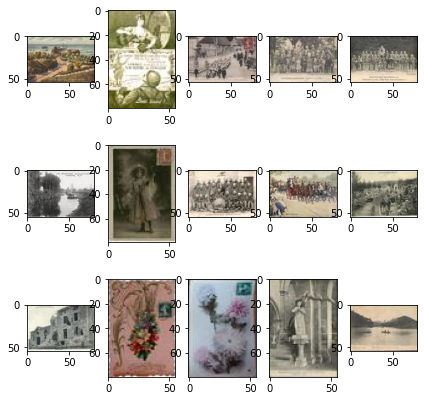

In [315]:
# these two variables are "the parameters" of this cell
import matplotlib.pyplot as plt
import numpy
plt.figure(figsize=(7,7))
for i in range(15):
    image = Image.open('6/' + str(i + 1500) + '.jpg')
    plt.subplot(3,5,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(image)




In [8]:
data['features'][0]

{'type': 'Feature',
 'properties': {'id': 0,
  'name': 'Bamiyan valley 1967 ',
  'country': 'Afghanistan',
  'source': 'https://upload.wikimedia.org/wikipedia/commons/1/1e/Bamiyan_valley_1967_postcard.jpg',
  'link': 'https://commons.wikimedia.org/wiki/File:Bamiyan_valley_1967_postcard.jpg',
  'discription': 'Bamiyan Valley, with shorter Buddha visible. Scan of a postcard purchased in 1967 in Afghanistan.',
  'path': '0.jpg',
  'date': 1967},
 'geometry': {'type': 'Point', 'coordinates': [34.75, 67.25]}}

In [16]:
s = []
d = []
for i in range(len(data['features'])):
    s.append(data['features'][i]['properties']['country'])
    d.append(data['features'][i]['properties']['date'])

In [95]:
statistics = {}
c = []
for i in range(len(s)):
    if s[i] not in c:
        c.append(s[i])
for i in range(len(c)):
    statistics[c[i]] = [0,[]]
for key, value in statistics.items():
    for i in range(len(s)):
        if s[i] == key:
            statistics[key][0] += 1
            if d[i] != 'Unknown date' and 1800 < d[i] < 2000:
                statistics[key][1].append(d[i])


In [96]:
statistics1 = {}
for key, value in statistics.items():
    if len(statistics[key][1]) == 0:
        statistics1[key] = [statistics[key][0],'Unknown date' , 'Unknown date']

    else:
        statistics1[key] = [statistics[key][0], min(statistics[key][1]), max(statistics[key][1])]
statistics1

5954
5954
5954
5954
5954
5954
5954
5954


{'Afghanistan': [11, 1910, 1970],
 'Albania': [18, 1900, 1920],
 'Algeria': [34, 1895, 1935],
 'Angola': [3, 1900, 1912],
 'Antigua and Barbuda': [1, 1920, 1920],
 'Argentina': [36, 1900, 1986],
 'Armenia': [7, 1903, 1917],
 'Aruba': [14, 1907, 1907],
 'Australia': [95, 1900, 1940],
 'Austria': [200, 1900, 1909],
 'Azerbaijan': [4, 1850, 1900],
 'Bahamas': [1, 'Unknown date', 'Unknown date'],
 'Belarus': [4, 1915, 1920],
 'Belgium': [63, 1870, 1935],
 'Belize': [1, 'Unknown date', 'Unknown date'],
 'Benin': [56, 1892, 1908],
 'Bermuda': [6, 1898, 1938],
 'Bhutan': [2, 1968, 1968],
 'Bolivia': [1, 'Unknown date', 'Unknown date'],
 'Bosnia and Herzegovina': [142, 1891, 1970],
 'Brazil': [11, 1899, 1946],
 'Bulgaria': [47, 1902, 1945],
 'Cambodia': [3, 1907, 1907],
 'Canada': [18, 1905, 1987],
 'Cape Verde': [23, 1900, 1909],
 'Central African Republic': [64, 1894, 1918],
 'the Channel Islands': [2, 1903, 1903],
 'Chile': [9, 1899, 1908],
 'China': [60, 1890, 1957],
 'Colombia': [13, 1900

In [86]:
statistics2 = sorted(statistics1.items(), key = lambda x: x[1])
statistics2 

[('Belize', [1, 1406, 1406]),
 ('Georgia', [1, 1891, 1891]),
 ('Mauritania', [1, 1905, 1905]),
 ('South Sudan', [1, 1906, 1906]),
 ('Guyana', [1, 1908, 1908]),
 ('Nicaragua', [1, 1910, 1910]),
 ('Uzbekistan', [1, 1910, 1910]),
 ('Malawi', [1, 1914, 1914]),
 ('the Dominican Republic', [1, 1916, 1916]),
 ('Antigua and Barbuda', [1, 1920, 1920]),
 ('Niger', [1, 1920, 1920]),
 ('Eritrea', [1, 1935, 1935]),
 ('Libya', [1, 1935, 1935]),
 ('Samoa', [1, 2010, 2010]),
 ('Bolivia', [1, 2021, 2021]),
 ('Bahamas', [1, 2350, 2350]),
 ('Jersey', [2, 1890, 1929]),
 ('Saudi Arabia', [2, 1900, 2015]),
 ('the Channel Islands', [2, 1903, 1903]),
 ('Vanuatu', [2, 1905, 2015]),
 ('Moldova', [2, 1910, 1910]),
 ('Guatemala', [2, 1910, 1911]),
 ('Sudan', [2, 1910, 1966]),
 ('Bhutan', [2, 1968, 2008]),
 ('the Czech Republic', [3, 1045, 2019]),
 ('Malaysia', [3, 1895, 2018]),
 ('Angola', [3, 1900, 1912]),
 ('Liberia', [3, 1900, 2021]),
 ('Pakistan', [3, 1906, 1930]),
 ('Honduras', [3, 1907, 1920]),
 ('Cambodia'

In [97]:
import pandas as pd
tabel = pd.DataFrame.from_dict(statistics1, orient='index',columns=['No. of Postcards', 'Start year', 'End year'])

In [102]:
tabel.head(10)

,No. of Postcards,Start year,End year
Afghanistan,11,1910,1970
Albania,18,1900,1920
Algeria,34,1895,1935
Angola,3,1900,1912
Antigua and Barbuda,1,1920,1920
Argentina,36,1900,1986
Armenia,7,1903,1917
Aruba,14,1907,1907
Australia,95,1900,1940
Austria,200,1900,1909


In [99]:
tabel1 = tabel.sort_values(by=['No. of Postcards'])

In [100]:
tabel1.head(10)

,No. of Postcards,Start year,End year
South Sudan,1,1906,1906
the Dominican Republic,1,1916,1916
Samoa,1,Unknown date,Unknown date
Eritrea,1,1935,1935
Antigua and Barbuda,1,1920,1920
Uzbekistan,1,1910,1910
Mauritania,1,1905,1905
Niger,1,1920,1920
Guyana,1,1908,1908
Bolivia,1,Unknown date,Unknown date


In [101]:
tabel1.tail(10)

,No. of Postcards,Start year,End year
Bosnia and Herzegovina,142,1891,1970
Norway,169,1881,1956
Mali,179,1901,1908
Malta C P,184,1890,1949
Guinea,189,1900,1950
Japan,193,1820,1945
the United States,199,1894,1966
France,199,1850,1997
Austria,200,1900,1909
Sweden,200,1890,1989


In [104]:
for i in range(len(data['features'])):
    print(data['features'][i]['properties']['name'])

Bamiyan valley 1967 
Buddha 1950s  2
Buddha 1950s 
Buddha Afghanistan Information Bureau 1950s
Buddha taller 1967 
Istalif  1950s
Pul-e Khishti Kabul 
Royal Park Jalalabad 
Zarnegar mausoleum palace  - cropped
Zarnegar mausoleum palace 
د امير عبدالرحمن خان ارامځای
Albanie-CP-0030
Duress Purger 13958
Kartolinë e mirënjohjes nga Sp. T. Ilo (1920)
Koritza-CP-0022
Msg048
Nopcsa 041
Numismatic  from the early 1900's - Albania
Object in old bazzar, Kruja
Object, Krujë
Postcard Kapllan Pasha Tomb Tirana
Shkodra 1924
Shkodra – old 
Shopping in Kruja
Stefanos Stournaras Santiquaranta No361 1916
Ura e Vjeter e Vezirit
Valona in Albanien
Valona Purger 13356
Valona Purger 13816
1890 vignes de Saoula Algérie
6 août 1928 Alger quai bd République palais Consulaire
ALG 191
Alger - Bibliotheque Nationale, front 2
Alger - Bibliotheque Nationale, front 3
Alger - Bibliotheque Nationale, front
Algeria 1800s Tupper Scrapbooks Collection 15
Algérie Cave Lautier (4.000 hectos), près Mazagan.
Algérie El-Ançor

Parc de Villeneuve-l'Etang, Sur les Bords du Lac, possibly Henri Biva or his son Lucien Biva c.1903
Paris Montmartre, Le Boulevard de Clichy et le Moulin-Rouge
Paris, ca.1900, La Rue du Val-de-Grâce
Paris, Pont Solferino. 702 10 (NBY 420112)
Paris, Trocadero. 702 11 (NBY 420898)
Paris. Le Grand Et Le Petit Palais. 933 P 29 (NBY 420799)
Paroisse Bienheureuse Jeanne d'Arc de Lunéville, La statue de la Bienheureuse jeanne d'Arc, bénite l CP 5525 PR
Photomontage with fountain pen and envelope
Pierre percée et ruines du Château CP 2581 PsurR
Pollet Bande 04
Pont-Sainte-Maxence. Le Pont sauté, Guerre de 1914 P-FG-CP-00701
ASIE - VIET NAM - TONKIN - HANOI - Le Pont Doumer
Captured Rebels Of Hanoi Poison Plot
Dong Xuan market old
Edge of the moat of Angkor Wat temples in Siem Reap region - 1918-1921
Expo coloniale 1906
Ga Hàng Cỏ
Kouang-tchéou-wan.
Kwangchowan militia
Kwangchowan. Fort Bayard
Mytho1
Naufrage sur Mékong (Indochine 1910)
Rach Cat Bridge in Bien Hoa in early 20th century (crop)
R

Les rapides de la Bia (Côte d'Ivoire)
Port-Bouët-Drague suceuse. La Tropicale
Port-Bouët-La Drague en travail dans le chenal
Port-Bouët-Le phare (Côte d'Ivoire)
Port-Bouët-Reconstruction du wharf après l'accident du 1er octobre 1905
Port-Bouët-Tuyau de refoulement de la drague
Port-Bouët-Vue générale (Côte d'Ivoire)
Poste d'Assikasso (Côte d'Ivoire)
Poste de Bondoukou (Côte d'Ivoire)
Rapides de la Bia entre Aboisso et Ahinta (Côte d'Ivoire)
Rue de Bingerville (Côte d'Ivoire)
Sur la piste de Bondoukou-Piste télégraphique (Côte d'Ivoire)
Sur la route d'Aboisso, à Ahinta (Côte d'Ivoire)
Sur le fleuve Comoé-Les rapides de Pétépré (Côte d'Ivoire)
Sur le fleuve Comoé-Pirogue dans les rapides (Côte d'Ivoire)
Sur le fleuve Comoé-Poste de Bettié (Côte d'Ivoire)
Sur les rives du fleuve Comoé-Le chef d'Aboisso vient à la rencontre de l'Administrateur (Côte d'Ivoire)
Un tam-tam à Assikasso (Côte d'Ivoire)
Une halte en lagune (mission J. Eysséric en Côte d'Ivoire)
Village d'Abradine (fleuve Comoé) 

Hochspannungszaun Belgien-Holland 3
Holland. - The Arresleede (NBY 441408)
Holland. A Race on Skates (NBY 441642)
Jacob Braakman - Dorpsstraat Voorhout - 1895
Kaart Kortgene-Den Haag 1904
Kaart Laren-Overveen 1906
Kaart Stadskanaal-Wildervank
Kerst- en nij-joars koarten (2017) 01
Kerst- en nij-joars koarten (2017) 02
Kerst- en nij-joars koarten (2017) 03
Kerst- en nij-joars koarten (2017) 04
Koopt heden Blue Band versch gekarnd
Nederlandsche Vereeniging Ons Leger
Netherlands 1894-02-19  Rotterdam-Vienna
Netherlands 1899-08-03  Amsterdam-Plauen
Netherlands 1918-07-02  Amsterdam - Brugg-Altenburg
Netherlands 1945-08-02 censored  Boskoop-Reinach
Numismatic  from the early 1900's - The Netherlands 01
Numismatic  from the early 1900's - The Netherlands 02
Postcard published in the Netherlands in or before 1901
Postcard to N.V. Meyjes en Höweler 1928-09-03 recto
Postcard to N.V. Meyjes en Höweler 1928-09-03 verso
Ribbius And Van Rijn Willemstad Picture 1888-back
Schmalspurige 2 B-Zweizylinde

Numismatic  from the early 1900's - Kingdom of Siam
Thai Charoen Phat Thai - 2017-04-15 (004)
Thai Charoen Phat Thai - 2017-04-15 (005)
Cession de Lomé à la France par l'Angleterre
Direction des Postes Lomé
Eglise Saint-Augustin de Lomé
Hochöfen in Banjeli (Nord-Togo) im Betrieb
Immeuble de la Direction des Travaux neufs Lomé
Immeuble de la Direction des voies de pénétration Lomé
Konkomba vor dem Häuptlingshaus in Banjeli
Lome-Marktstrasse
Lomé Togo Weg nach dem Gouverneurspalast 1904
Mairie de Lomé
Maison commune Togolaise Le Cercle
Nouveau palais de justice Lomé
Wharf de Lomé
Beja pont cinquieme
Ben Gardane synagogue
Bordj leboeuf goum
Béja - Brasserie du Phénix
Carthage carton
Casino de Tindja reconverti en église
Cavalier arabe en costume de Fantasia - Tunisie
Changeur juif - Tunisie - avant 1910
Chechia gafsa
Dar Chaabane
Djerissa vue-generale 1907
Enfida - Tunisia - Old PostCard
Etat Major - Arsenal Sidi-Abdallah - Ferryville - Tunisie
Fernana arbre legendaire
Ferryville - Casern

In [108]:
print(data['features'])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

